In [1]:
from cpr.Nivel import Nivel
import cpr.information as info
import datetime
import numpy as np

/usr/local/lib/python3.6/dist-packages/wmf/wmf.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mcano/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mcano/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mcano/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/home/mcano/.local/lib/python3.6/site-

In [2]:
self = Nivel(codigo=93,SimuBasin=True,**info.LOCAL)
info.REMOTE['host'] = 'localhost'

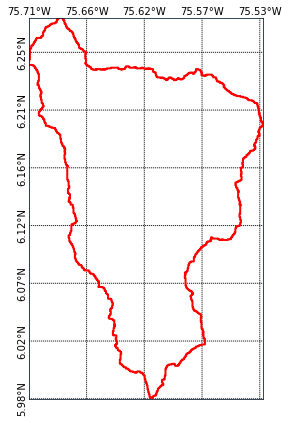

(<mpl_toolkits.basemap.Basemap at 0x7f2b130d2668>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b13145c18>)

In [3]:
self.Plot_basin()

In [4]:
from wmf import wmf
wmf.models.show_storage = 0
wmf.models.show_mean_speed = 0
wmf.models.retorno = 1
wmf.models.separate_fluxes = 1
wmf.models.sim_sediments = 0
wmf.models.show_mean_speed = 1
wmf.models.show_speed = 1

In [5]:
start = '2018-04-15'
end = '2018-04-18'

In [6]:
level = self.level(start,end)

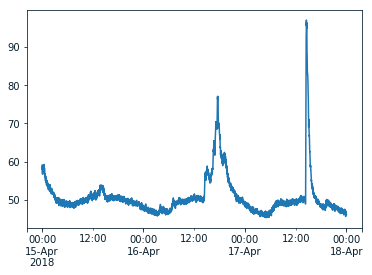

In [7]:
level.plot()

In [8]:
start = '2018-04-16 12:00'
end = '2018-04-17 02:00'

In [9]:
rain = self.radar_rain(start,end)

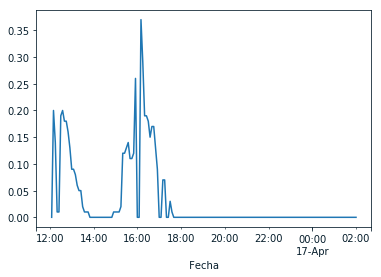

In [10]:
rain.plot()

In [11]:
vect = self.radar_rain_vect(start,end)

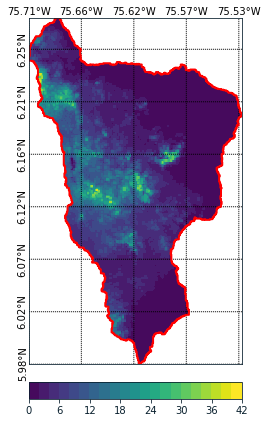

(<mpl_toolkits.basemap.Basemap at 0x7f2b10cb30b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b10fe4c18>)

In [12]:
self.Plot_basin(vec =  vect.sum().values/1000.0)

In [13]:
filepath = '/home/mcano/dev/cprweb/src/media/user_output/radar/201804161200-201804170200-93-sample_user'

In [14]:
n_intervals = 10
Calibracion = [5.0, 2.0, 10.0, 0.0, 0.008, 5.0, 2.3, 2.0, 1.0, 1.0]
Run = self.run_shia(Calibracion,
             filepath + '.bin',
             N_intervals = n_intervals,
             EvpVariable = True)

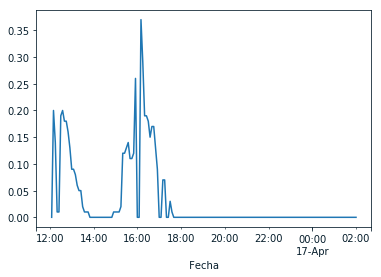

In [15]:
kwargs =  {
        'start':start,
        'end':end,
        'cuenca':self.nc_path,
        'rutaNc':self.radar_path,
        'rutaRes':self.rain_path+self.file_format(start,end),
        'dt':300,
        'umbral': 0.005,
        'verbose':True,
        'super_verbose':True,
        'old':None,
        'save_class':None,
        'store_true':None,
        'save_escenarios':None,
        'store_true':None,
       }

self.radar_rain(start,end).plot()

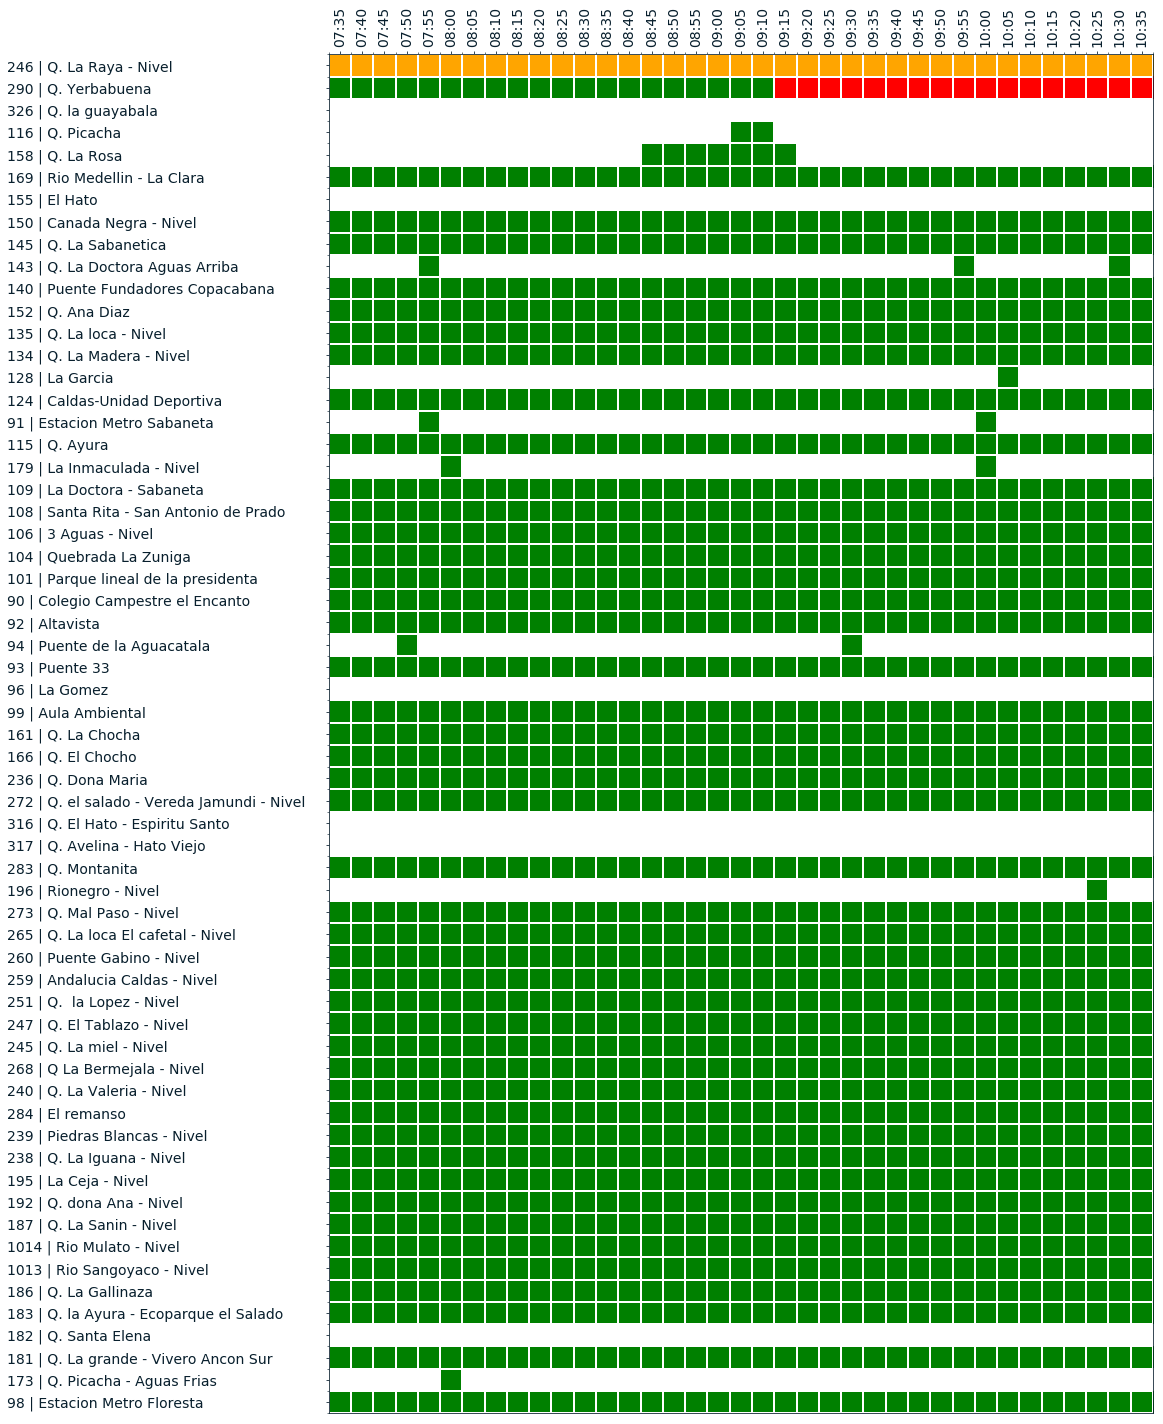

In [16]:
self.reporte_nivel()

In [17]:
import matplotlib.pyplot as plt

In [18]:
self.plot_basin_rain(vec=vect.sum().values/1000.)

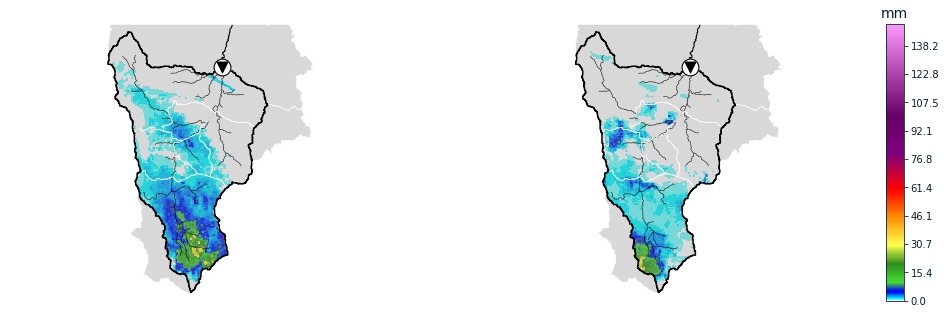

In [19]:
self.rain_report(start)

/usr/local/lib/python3.6/dist-packages/cpr/Nivel.py:1030: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  x,lamina = (series.argmax(),series.max())
/usr/local/lib/python3.6/dist-packages/cpr/Nivel.py:1148: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  ax.annotate(u'máximo', (mdates.date2num(series.argmax()), series.max()), xytext=(10, 10),textcoords='offset points',fontsize=14)
/usr/local/lib/python3.6/dist-packages/cpr/Nivel.py:1169: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum

99
90
106
109
116
124
128
134


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


143
145
150
169
161
166
173
183
0:00:40.255151


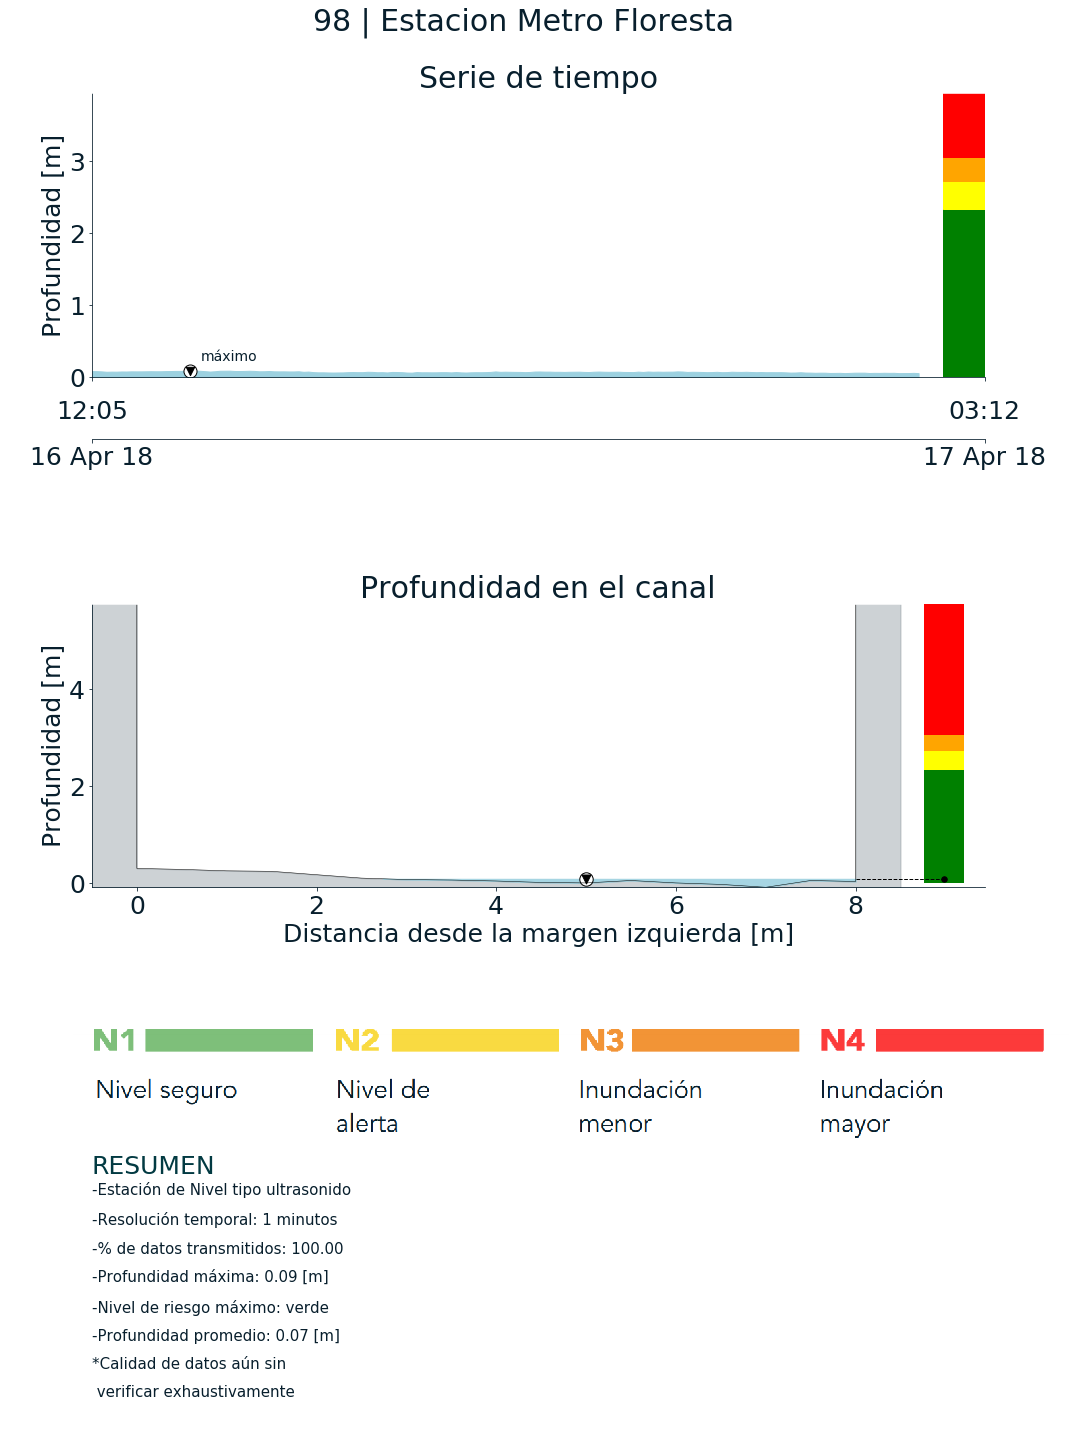

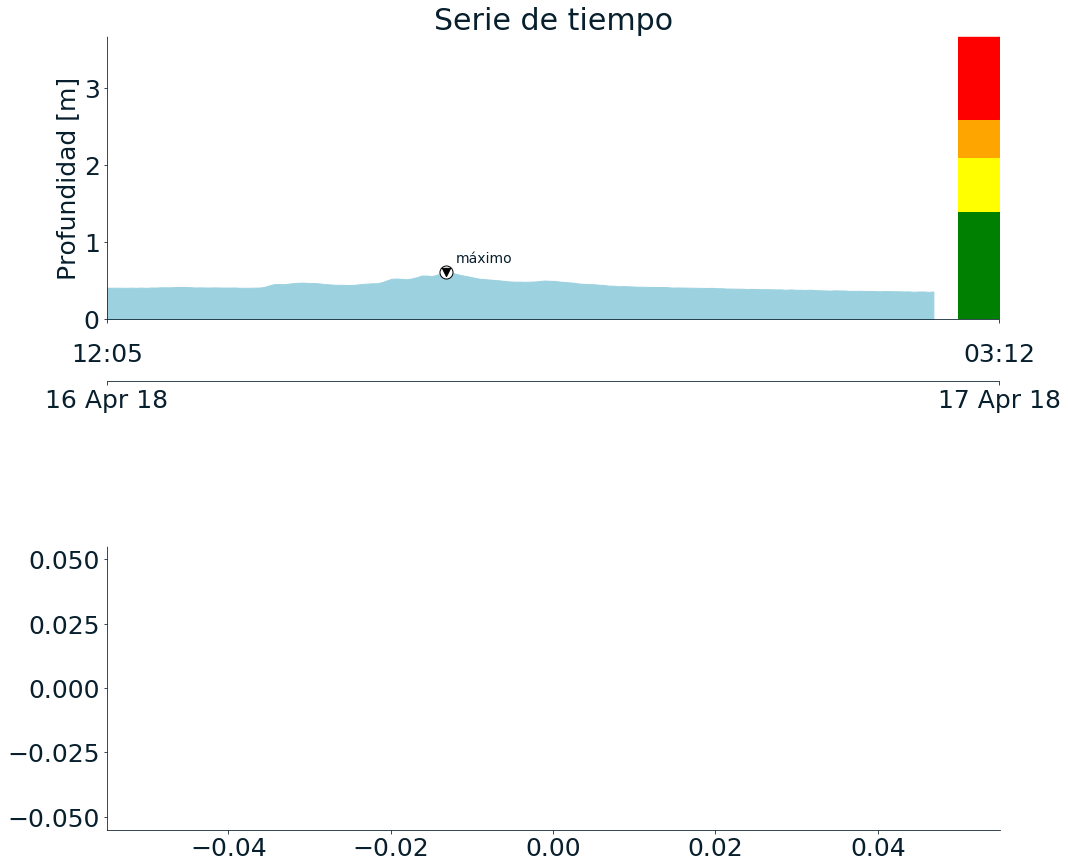

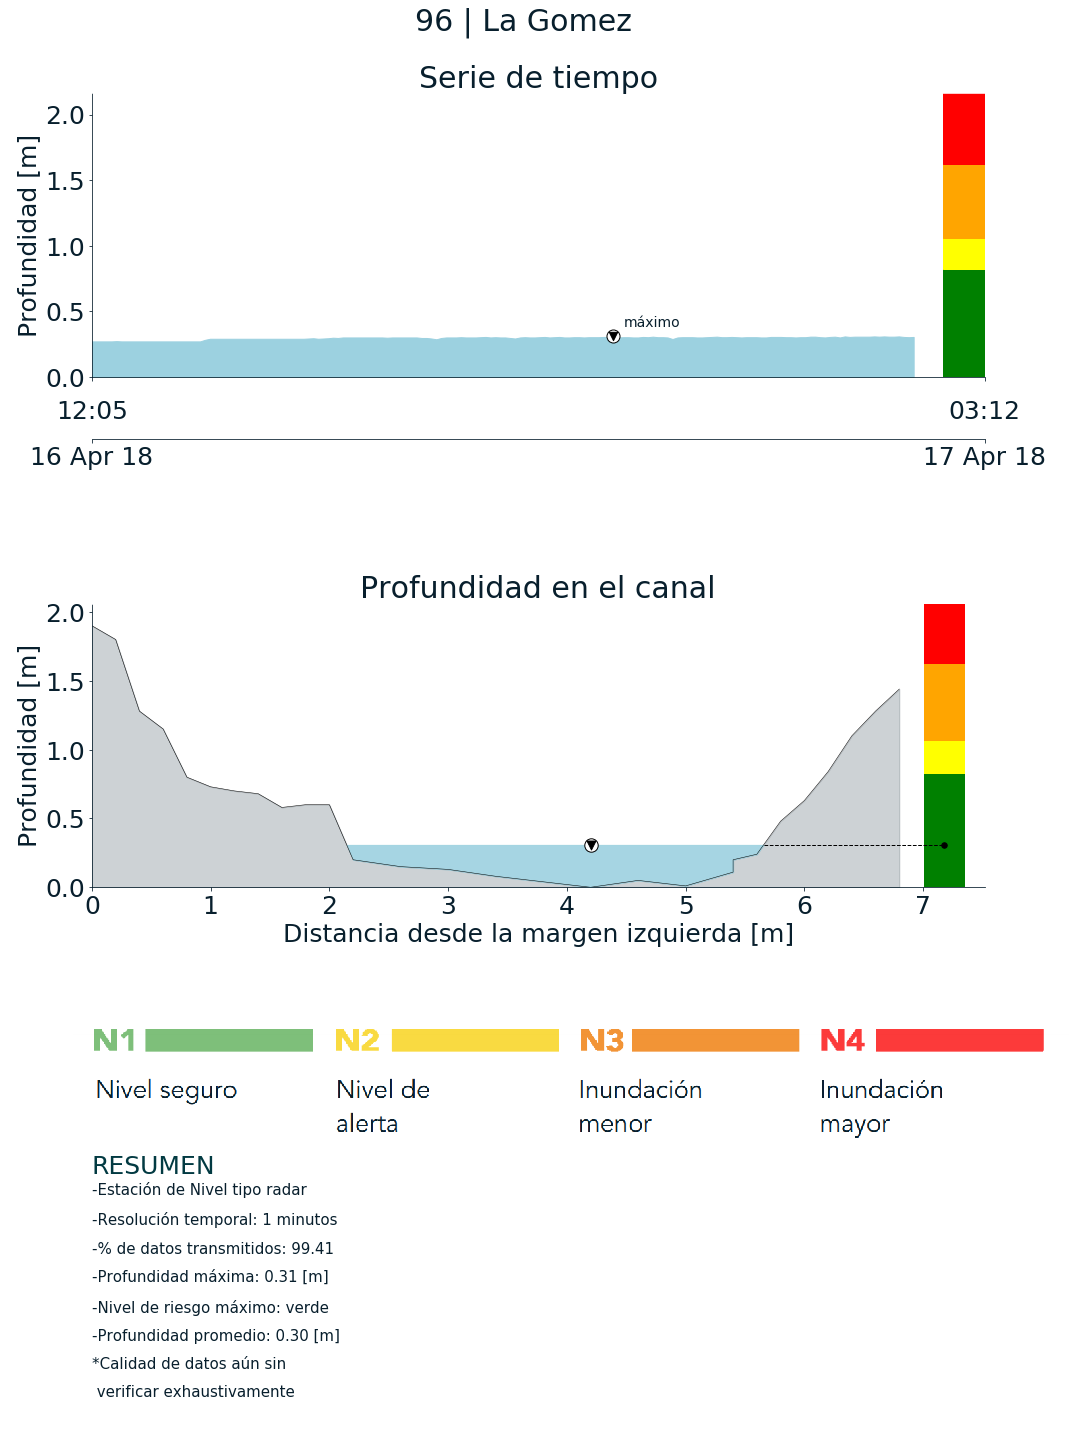

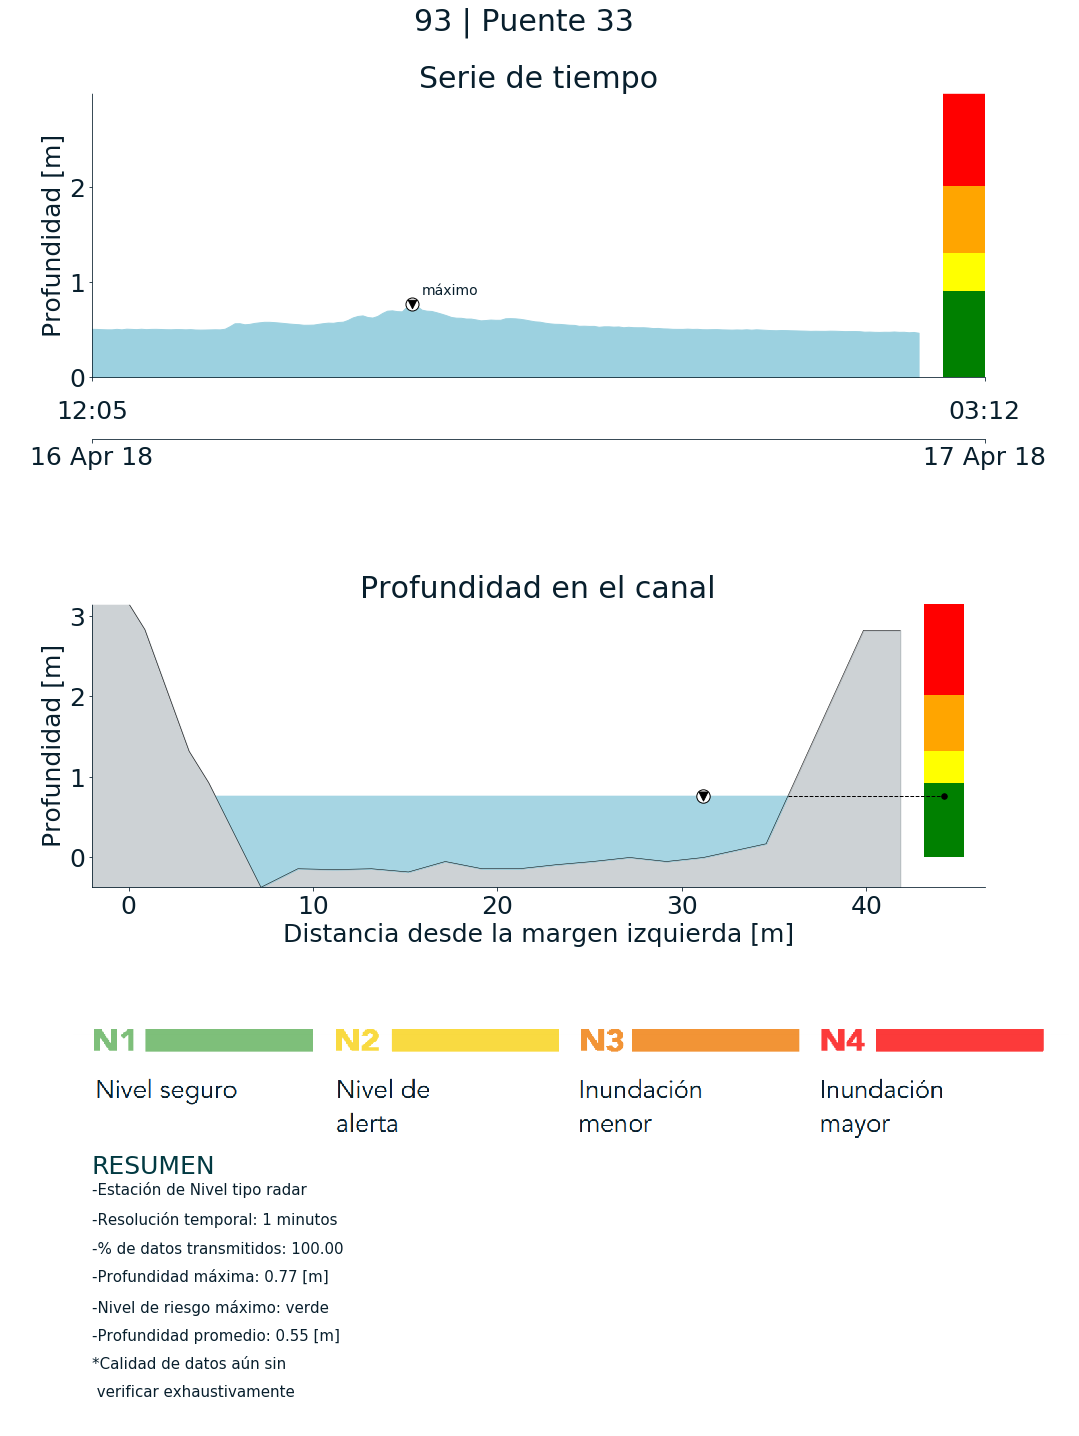

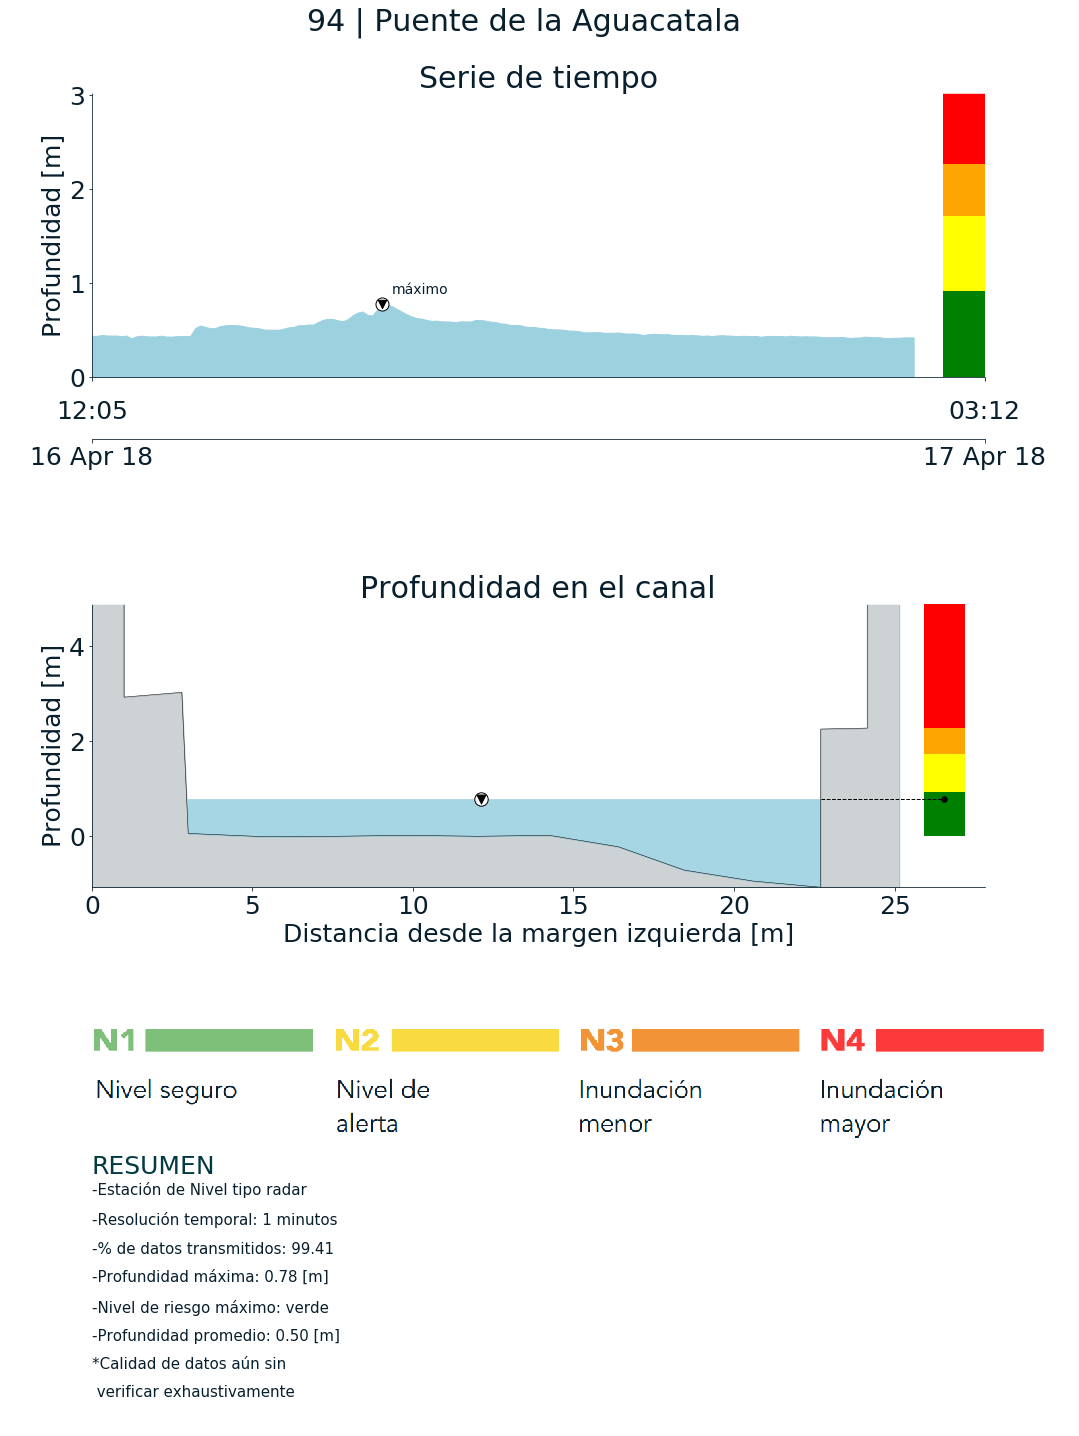

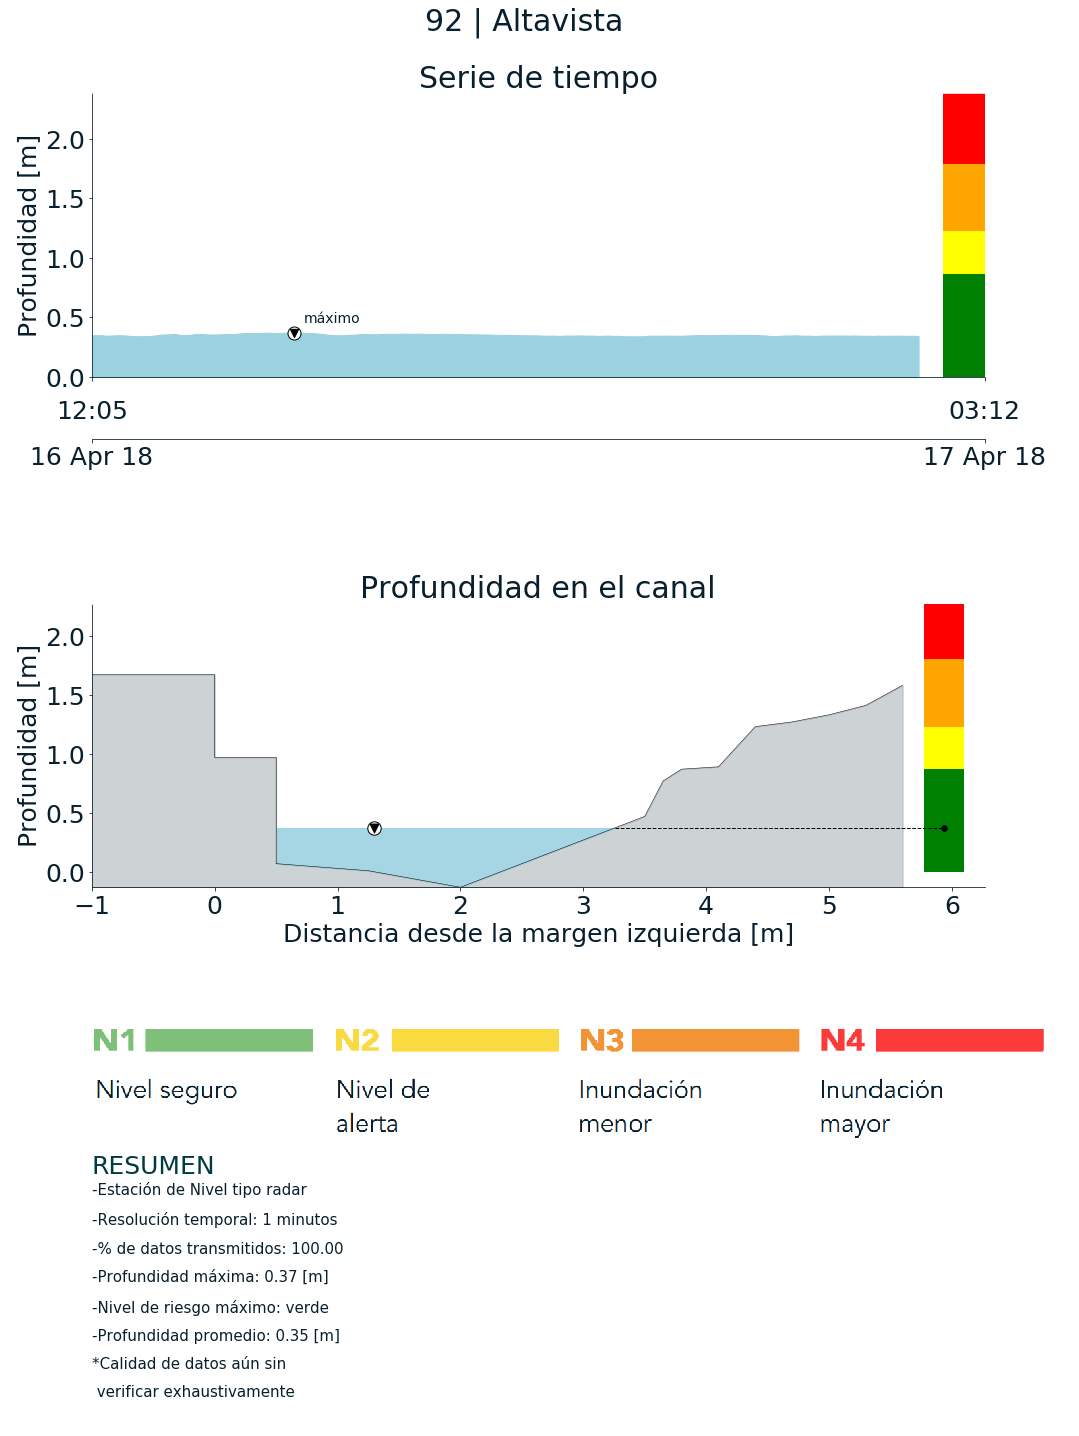

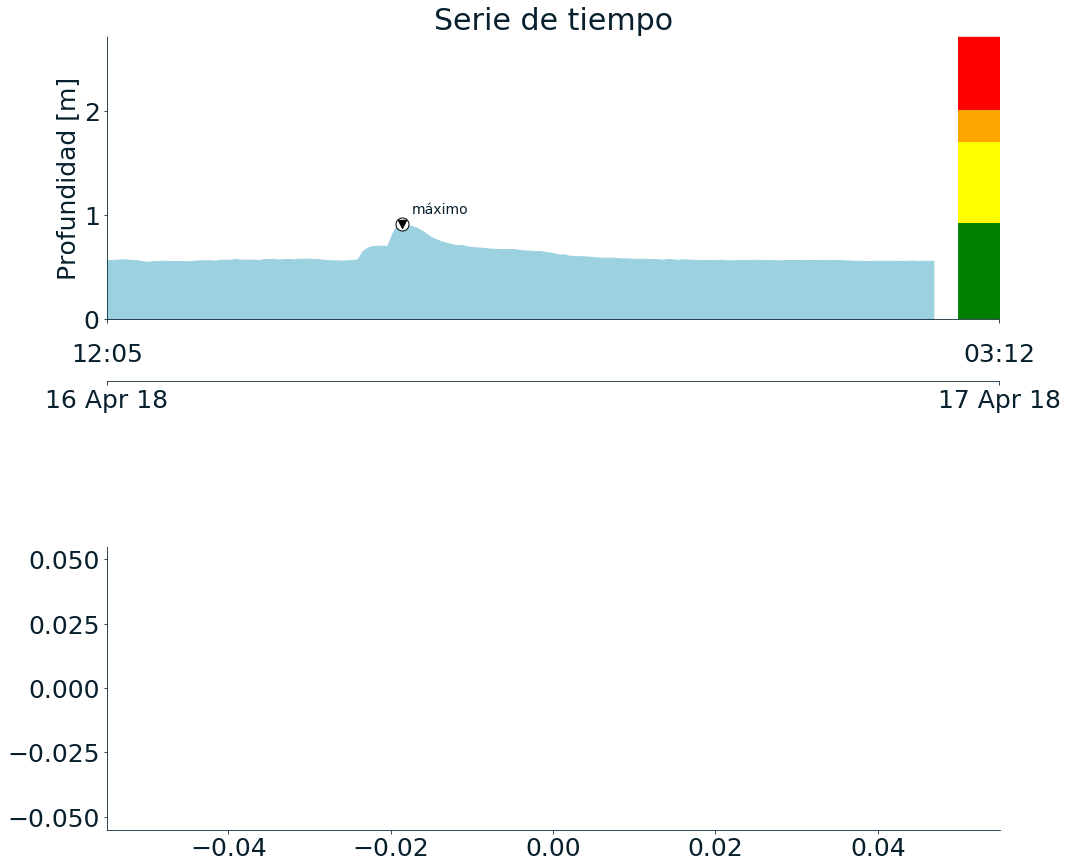

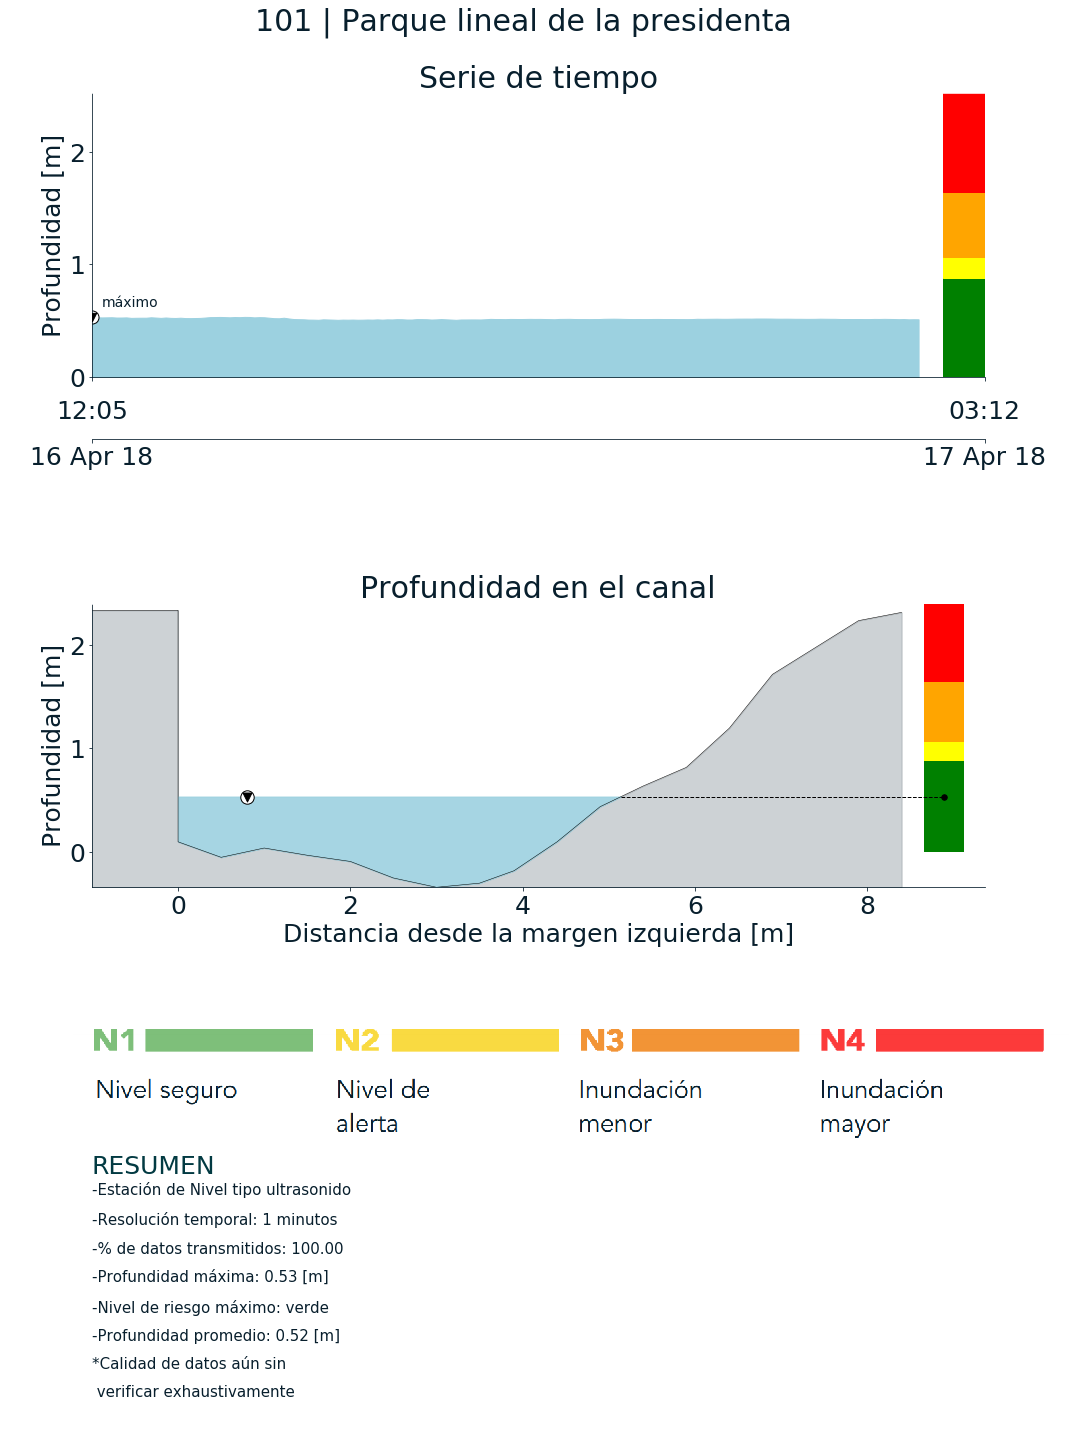

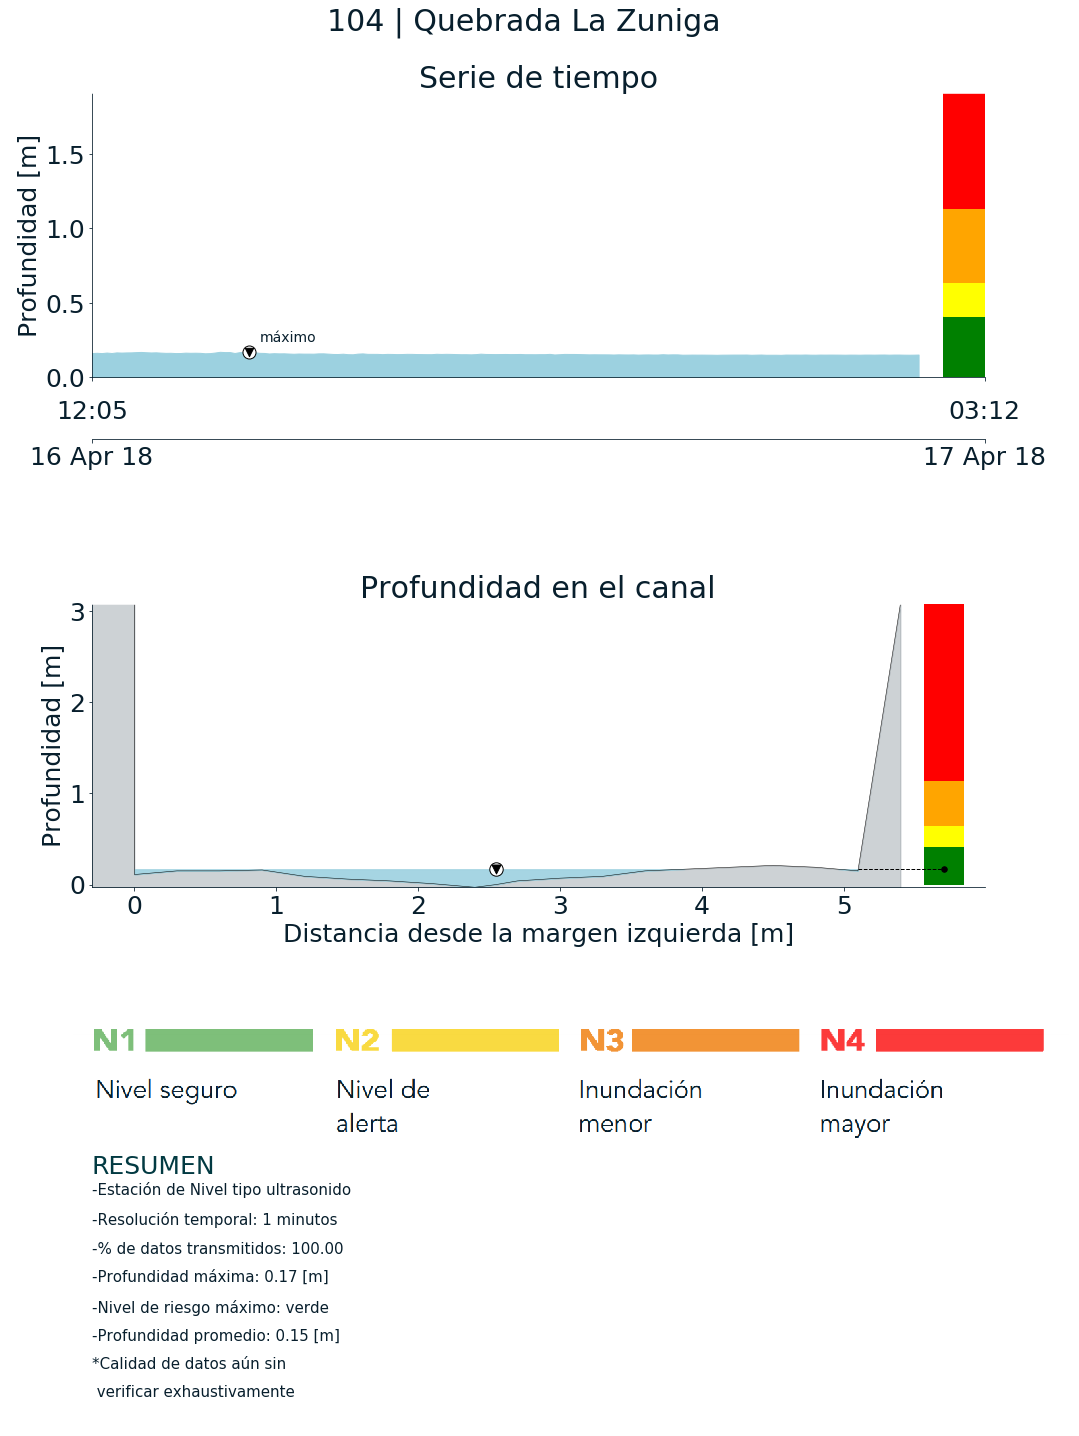

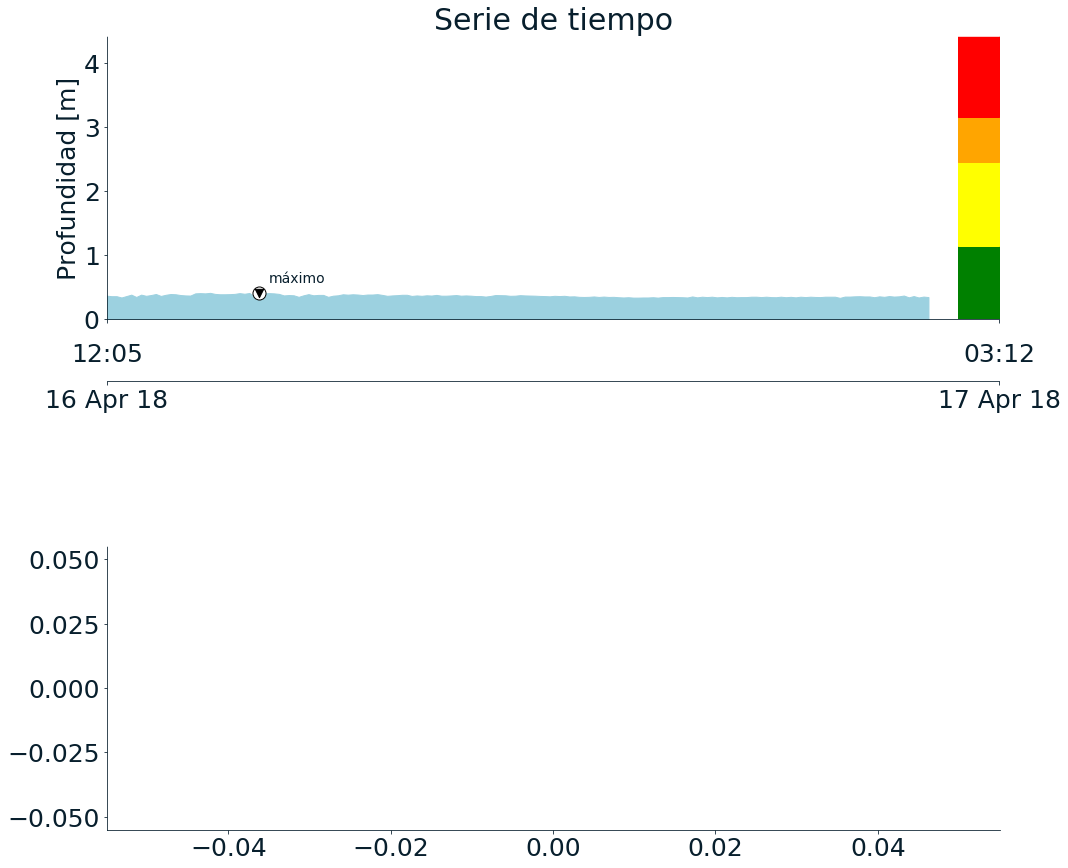

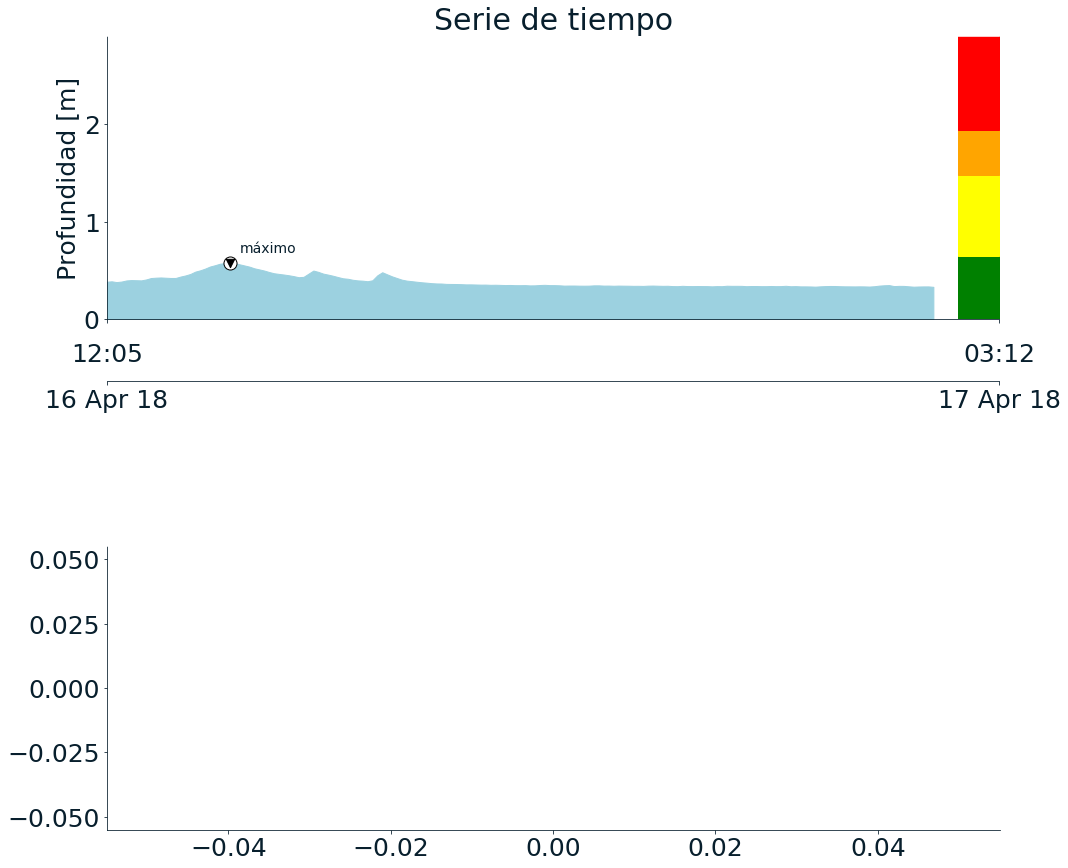

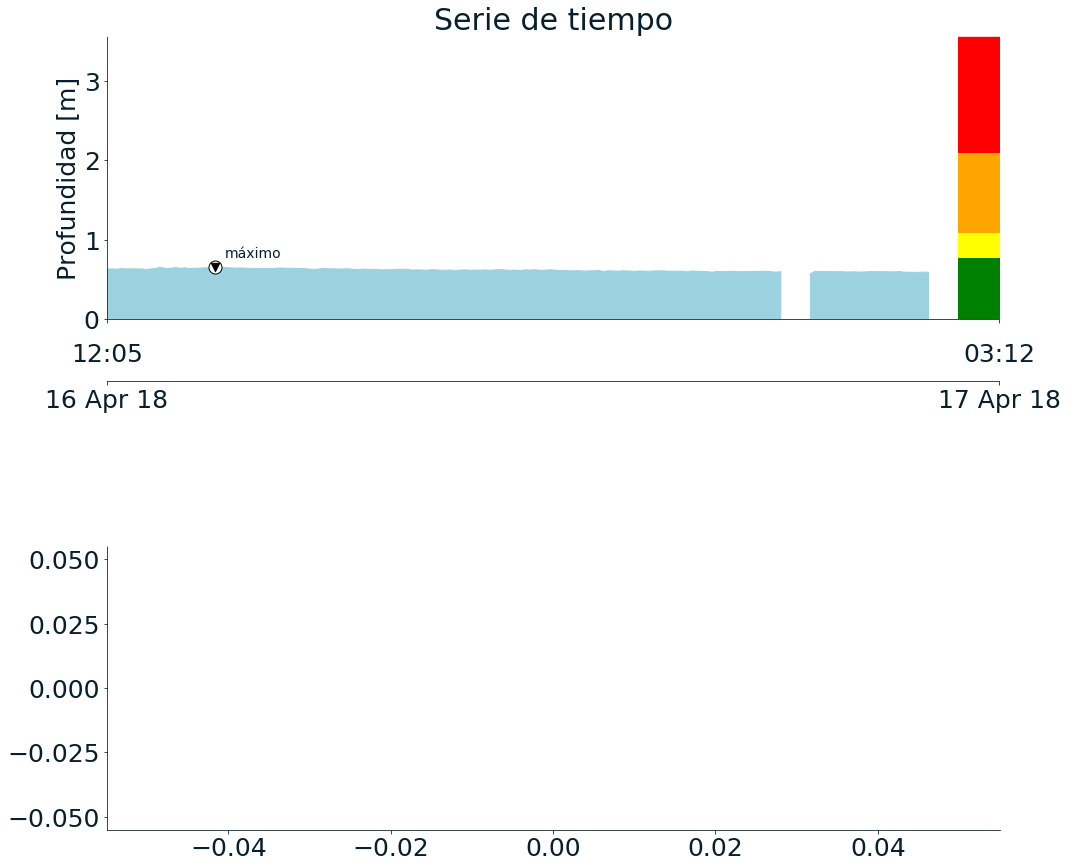

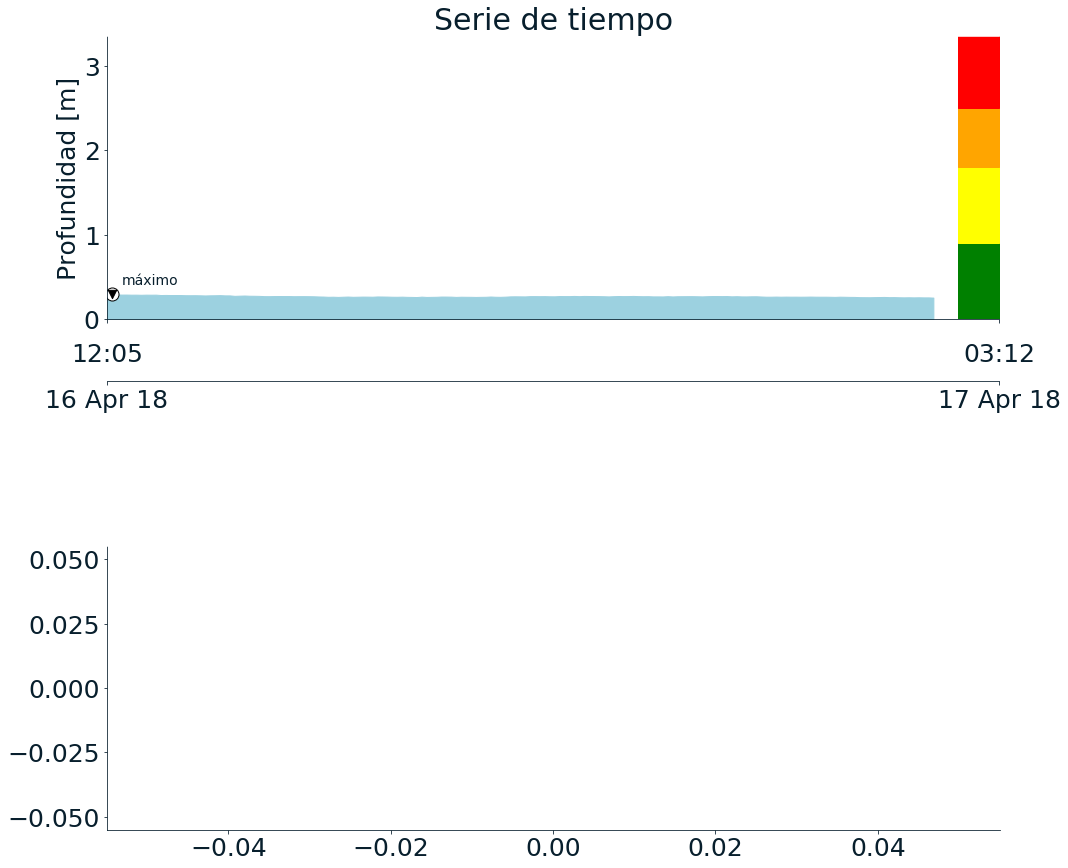

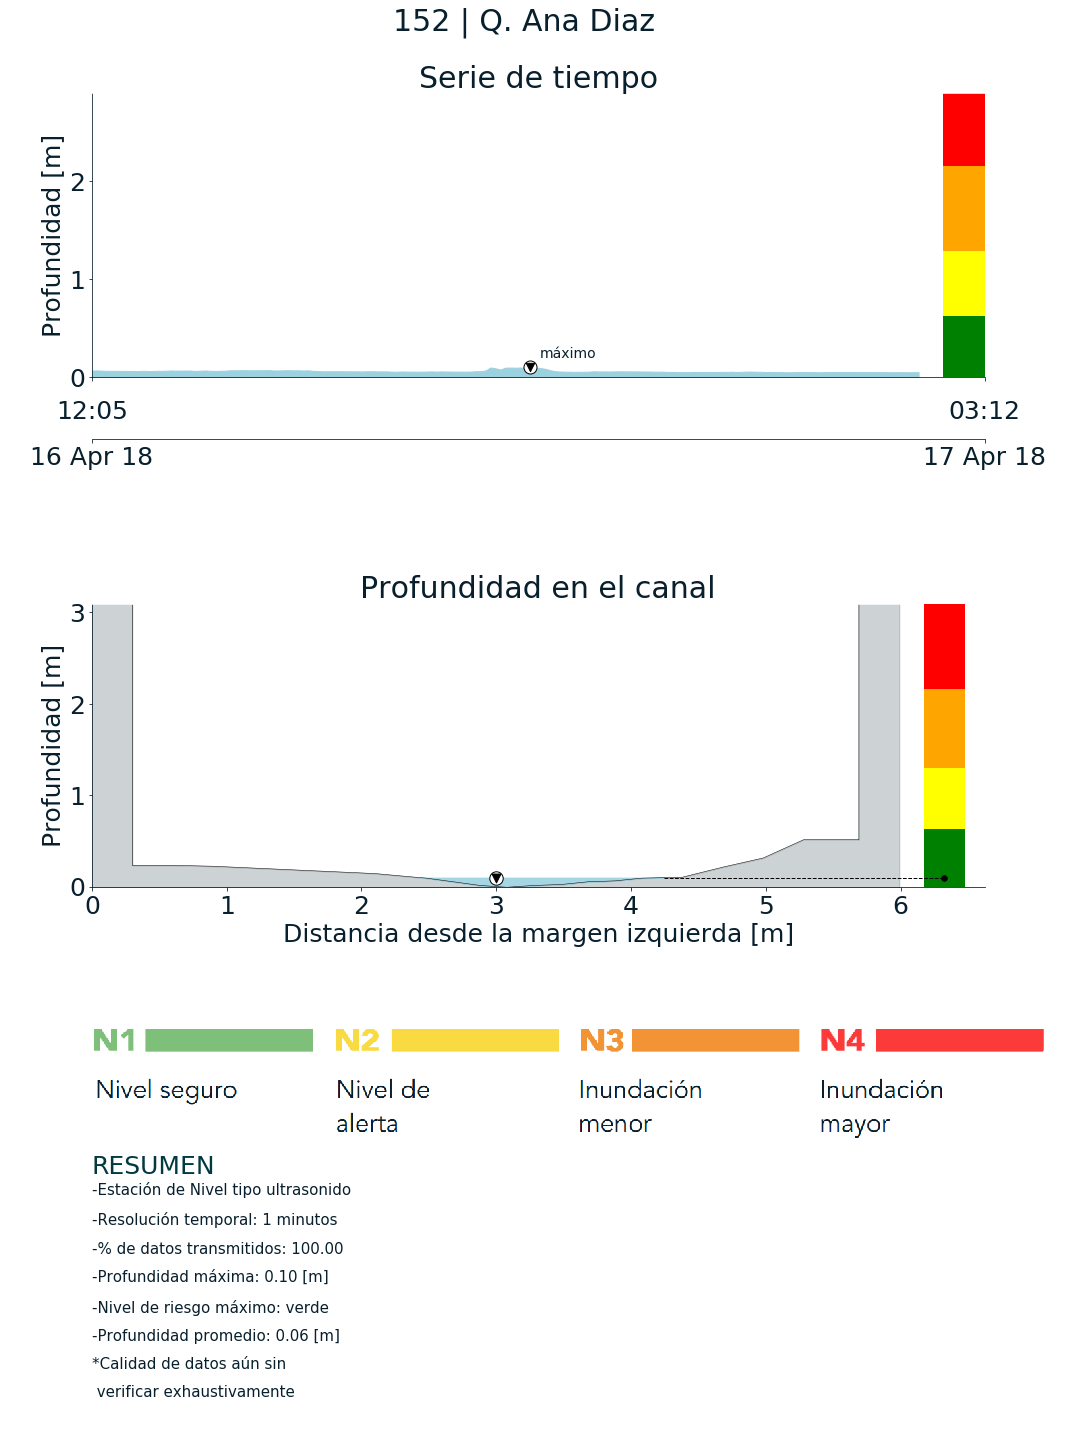

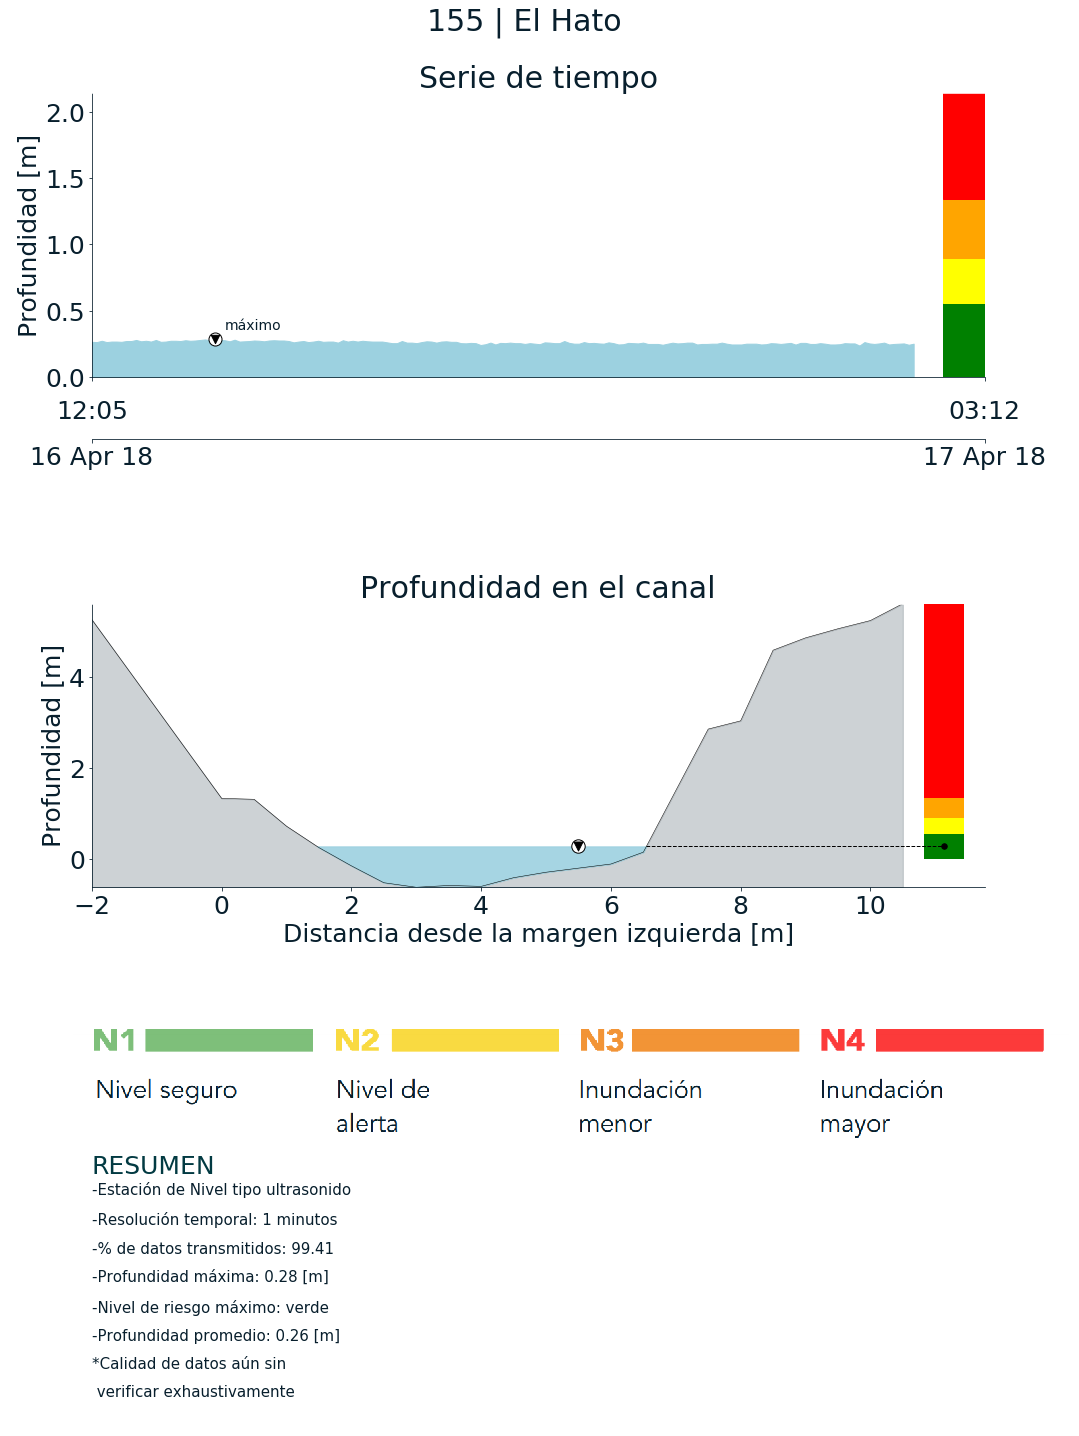

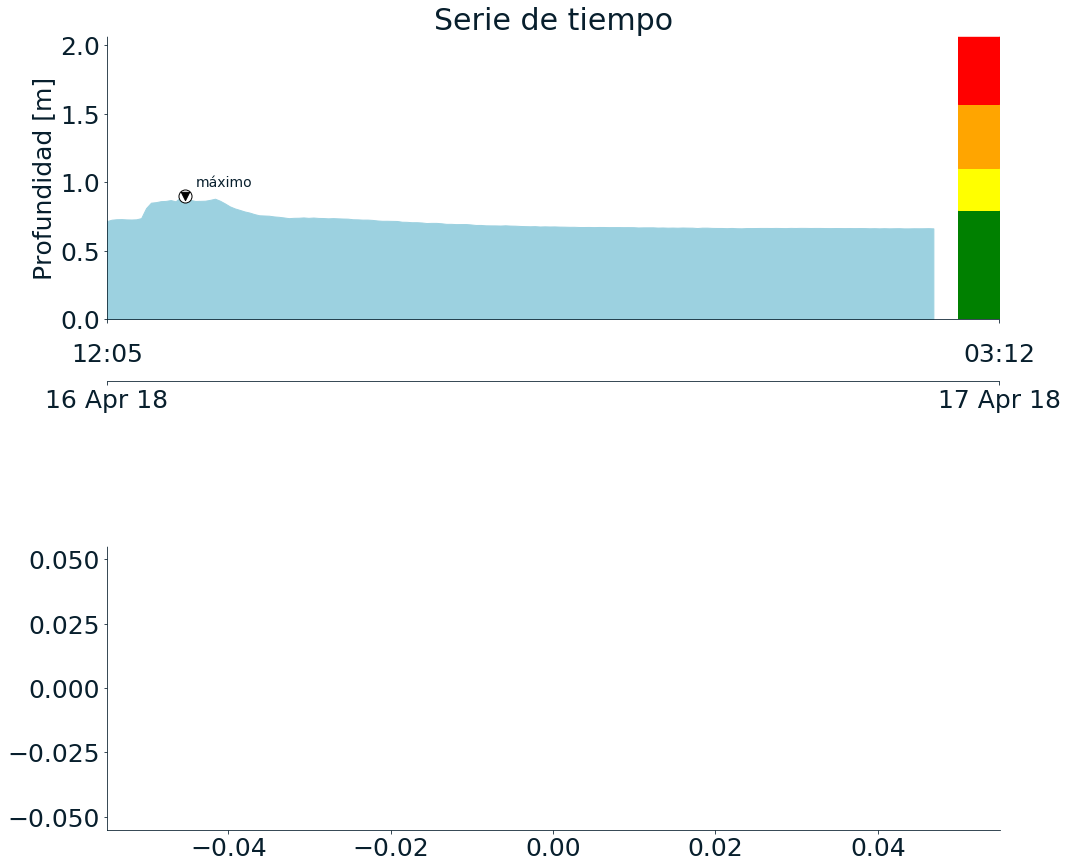

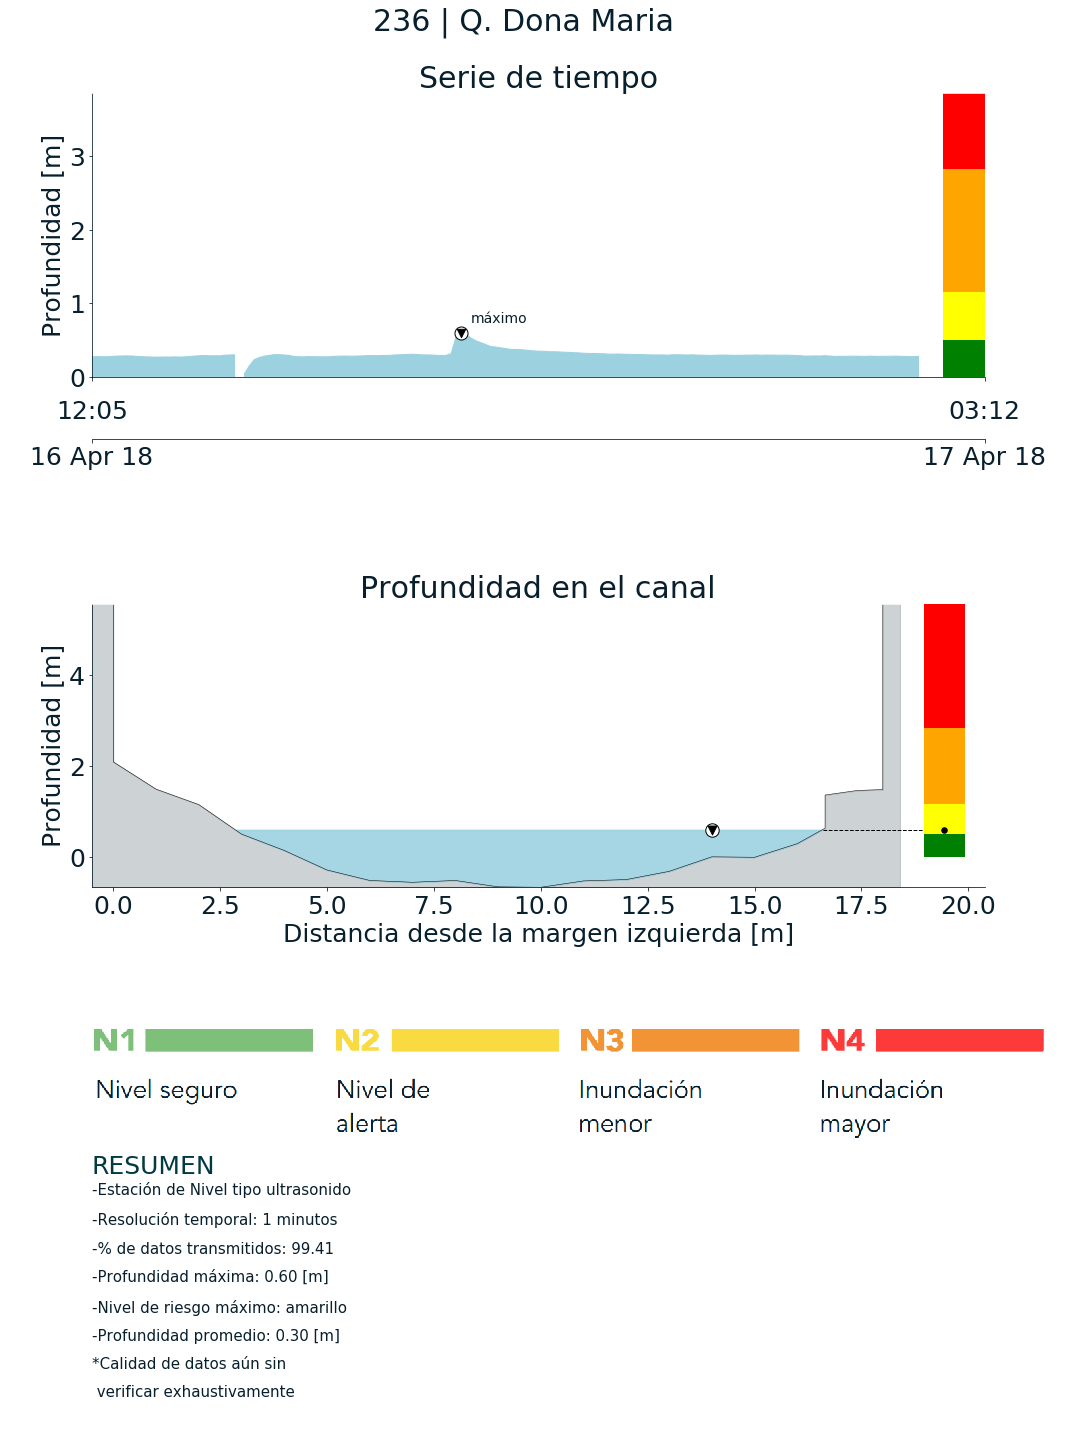

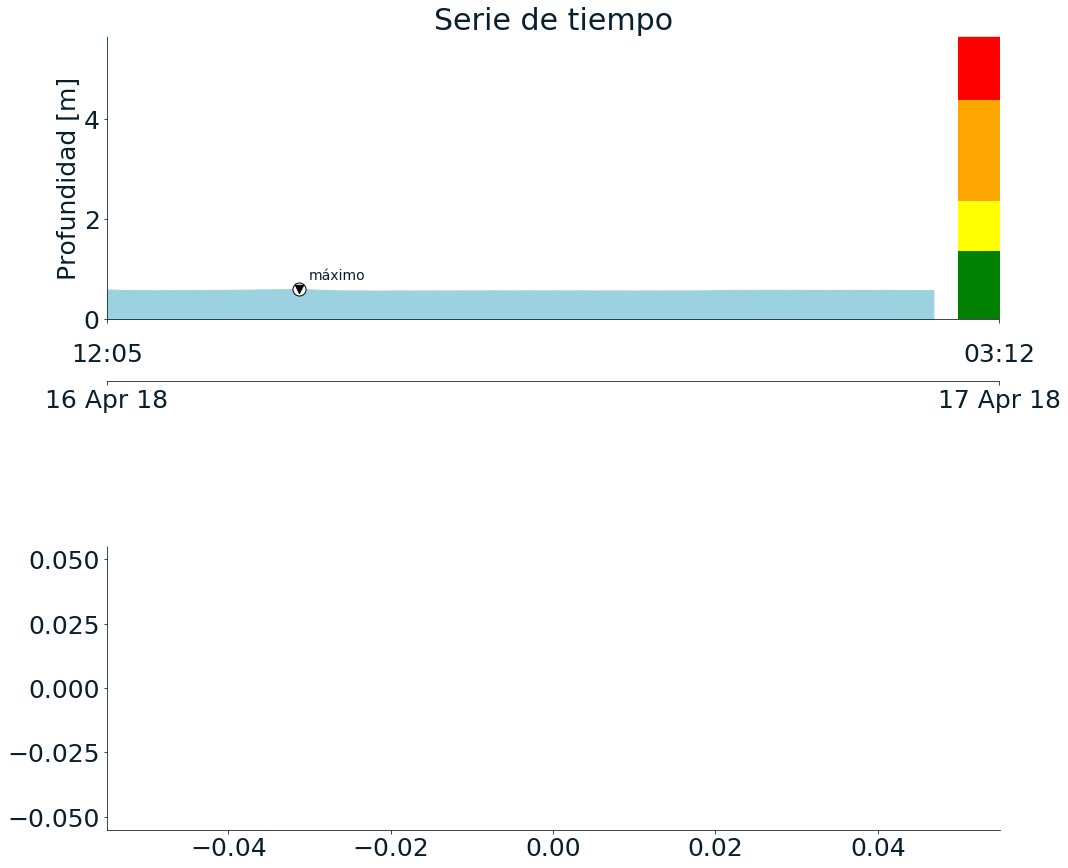

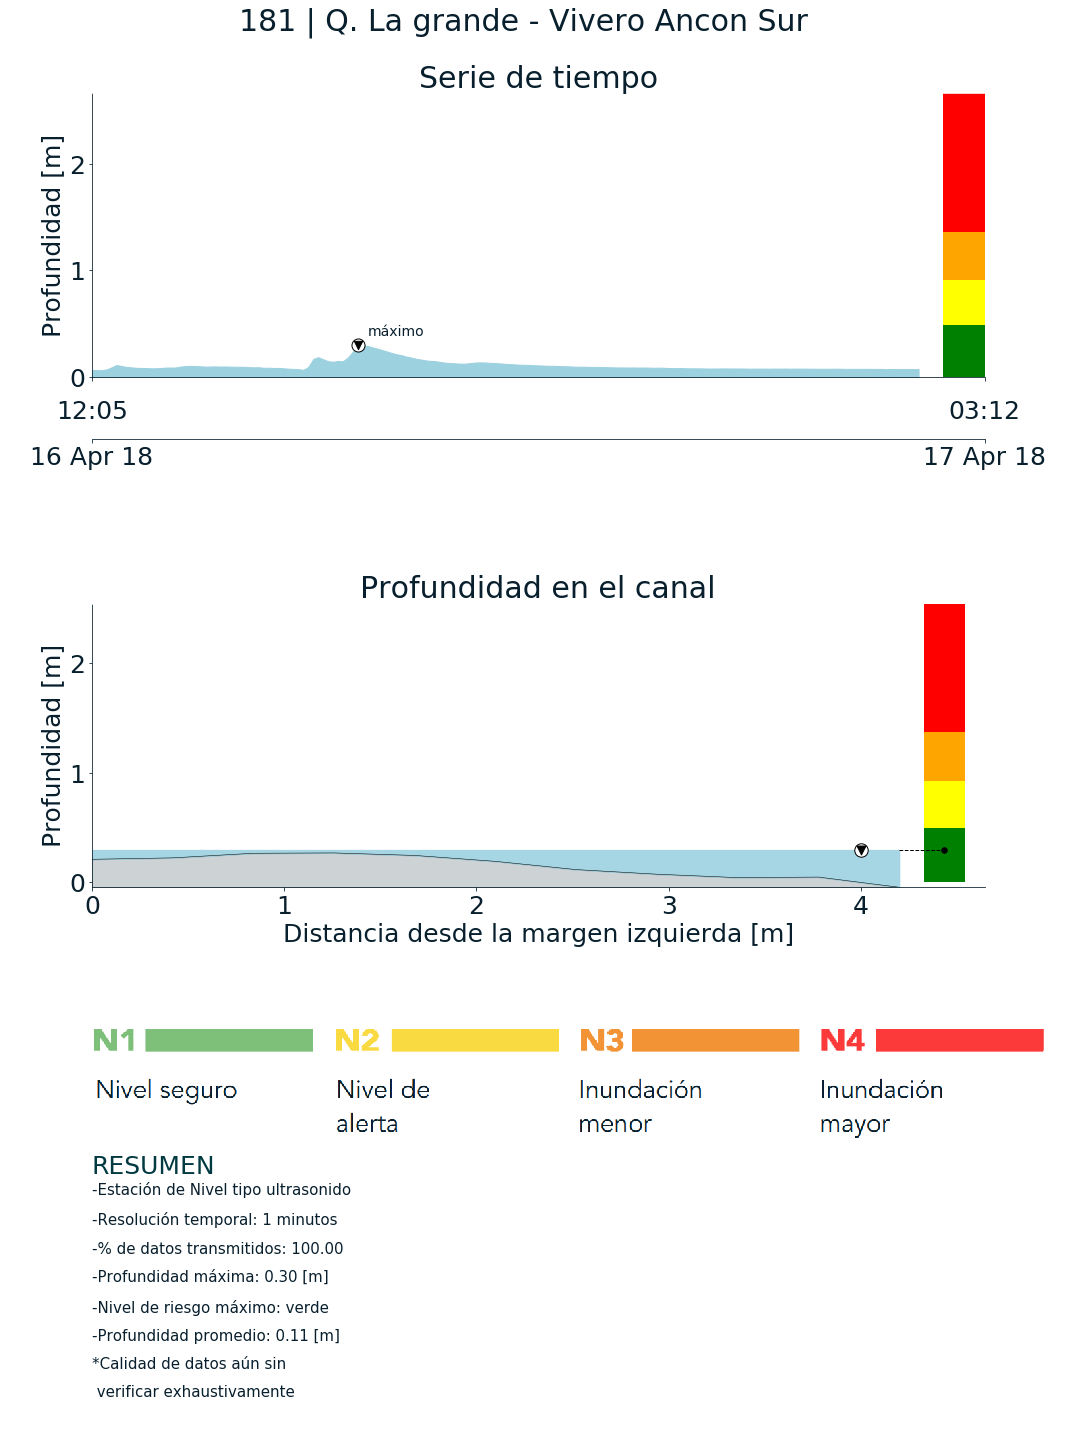

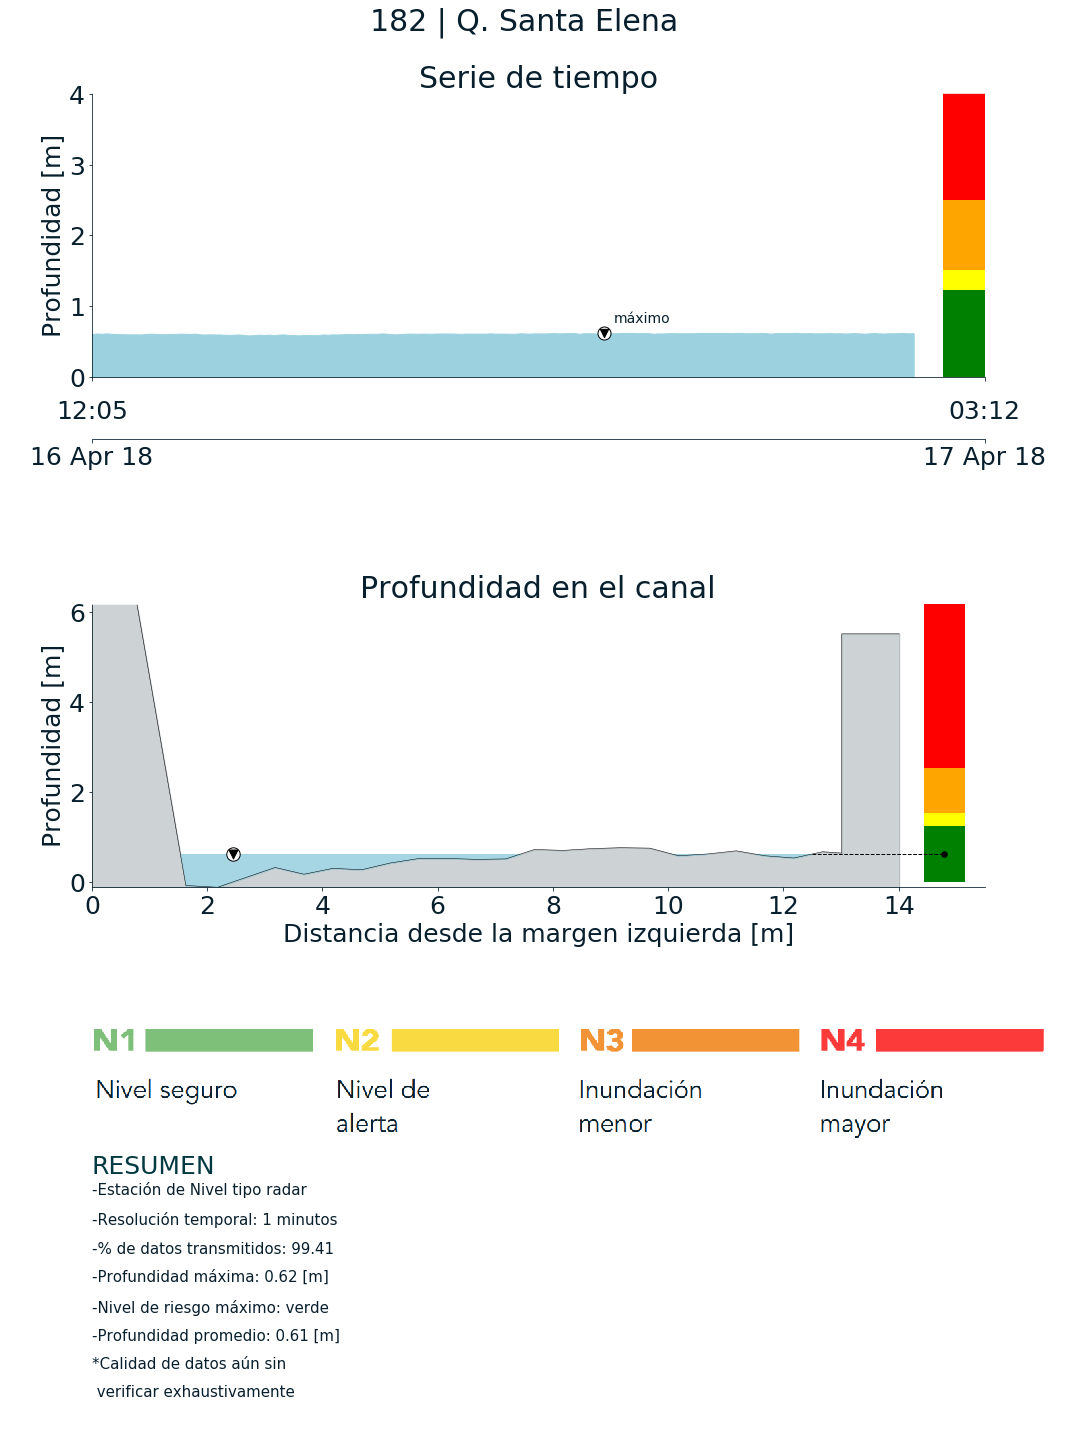

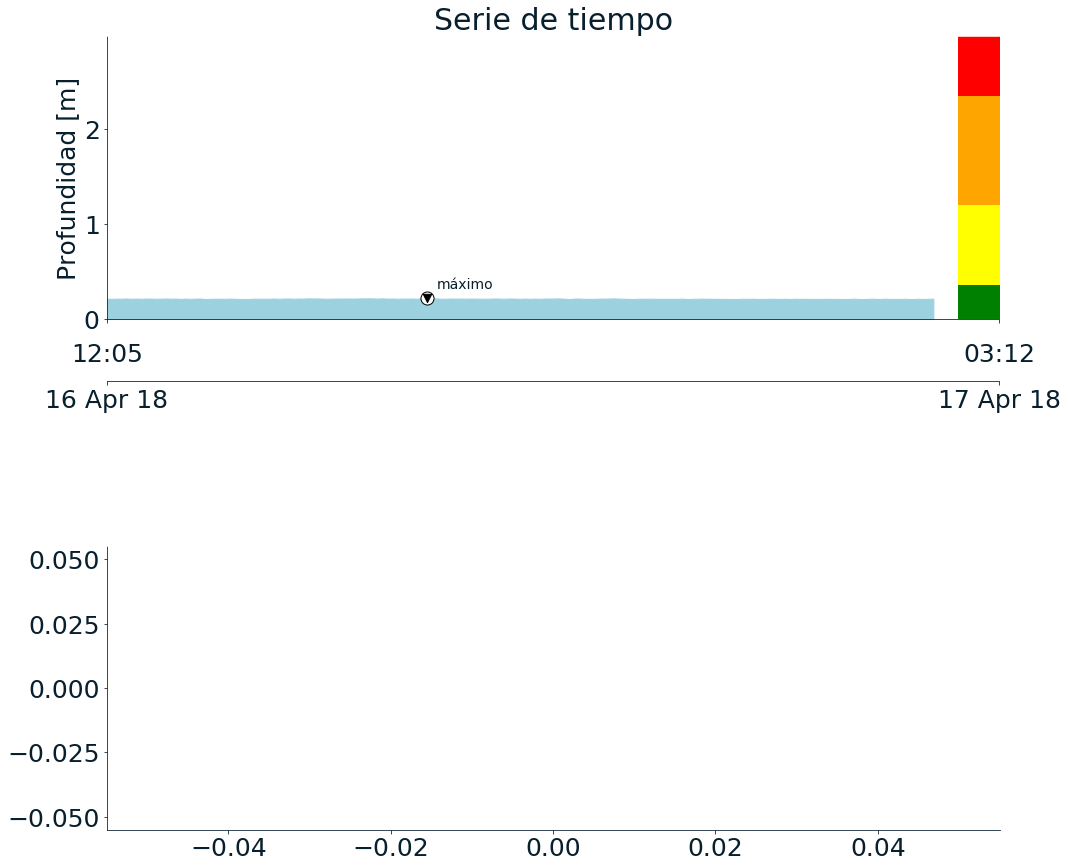

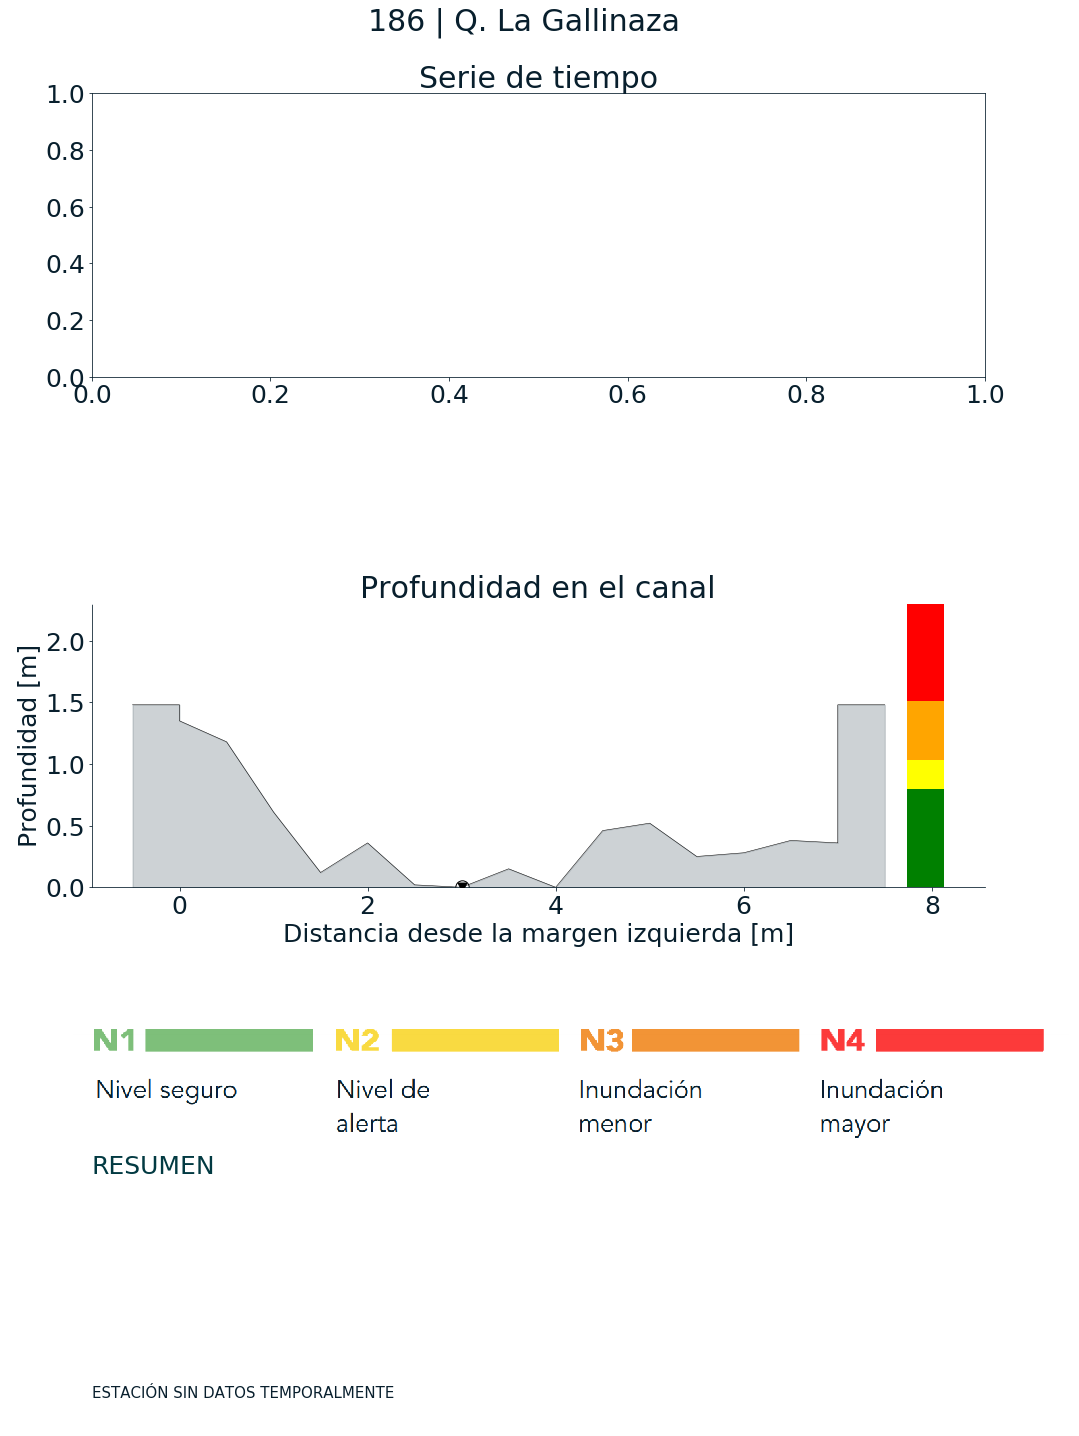

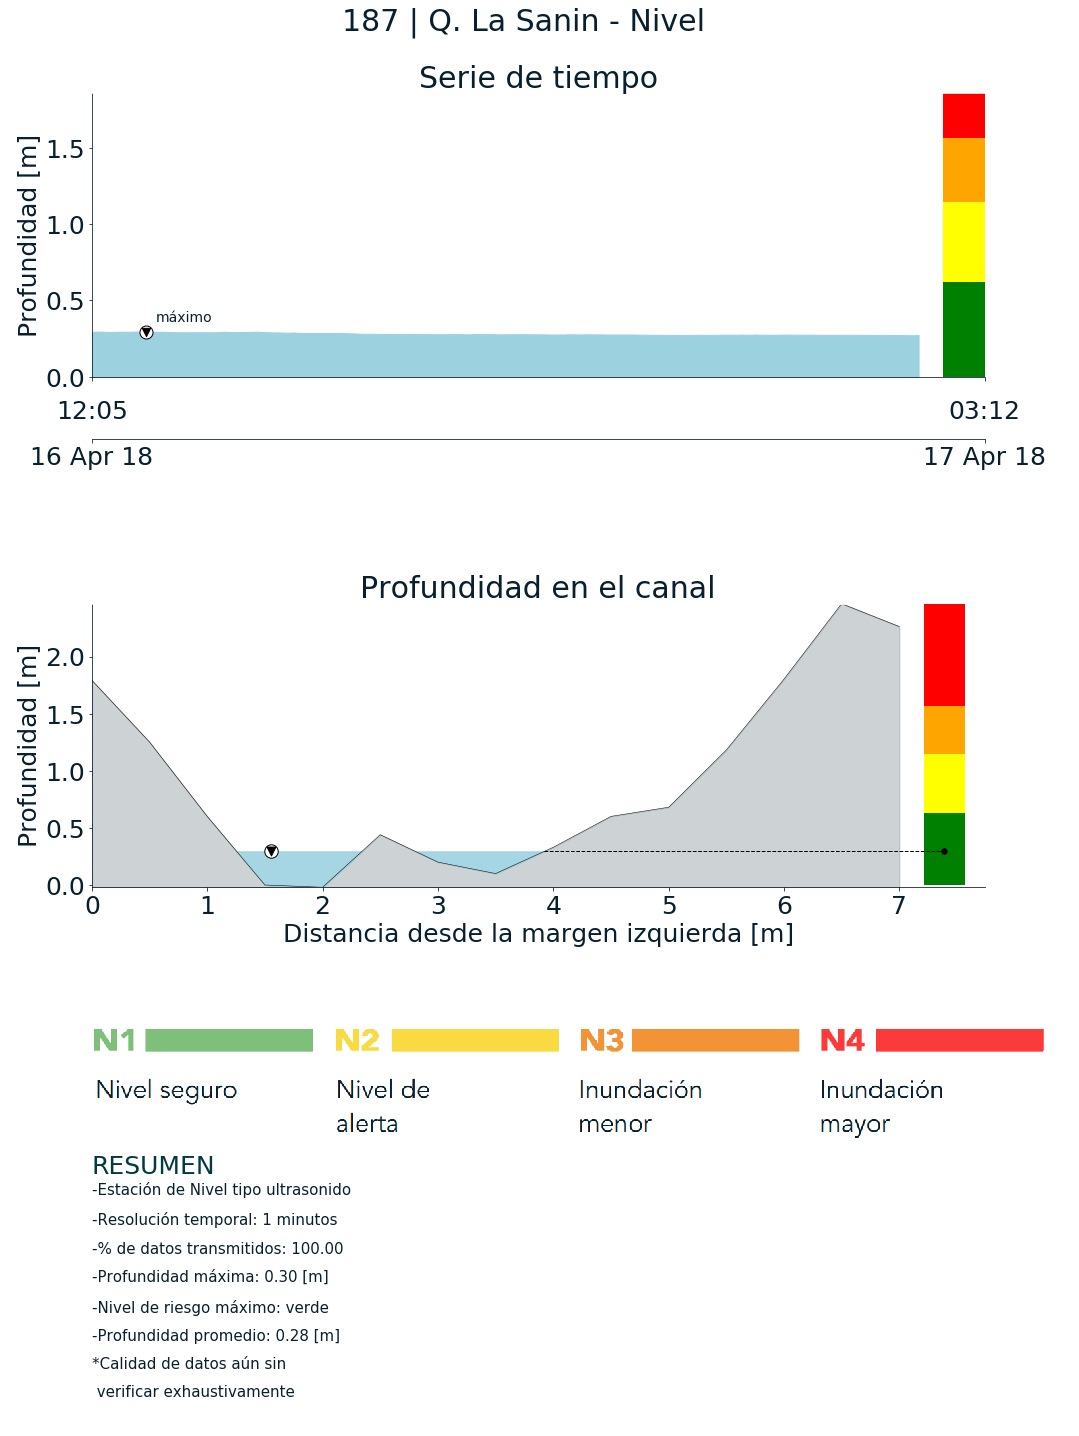

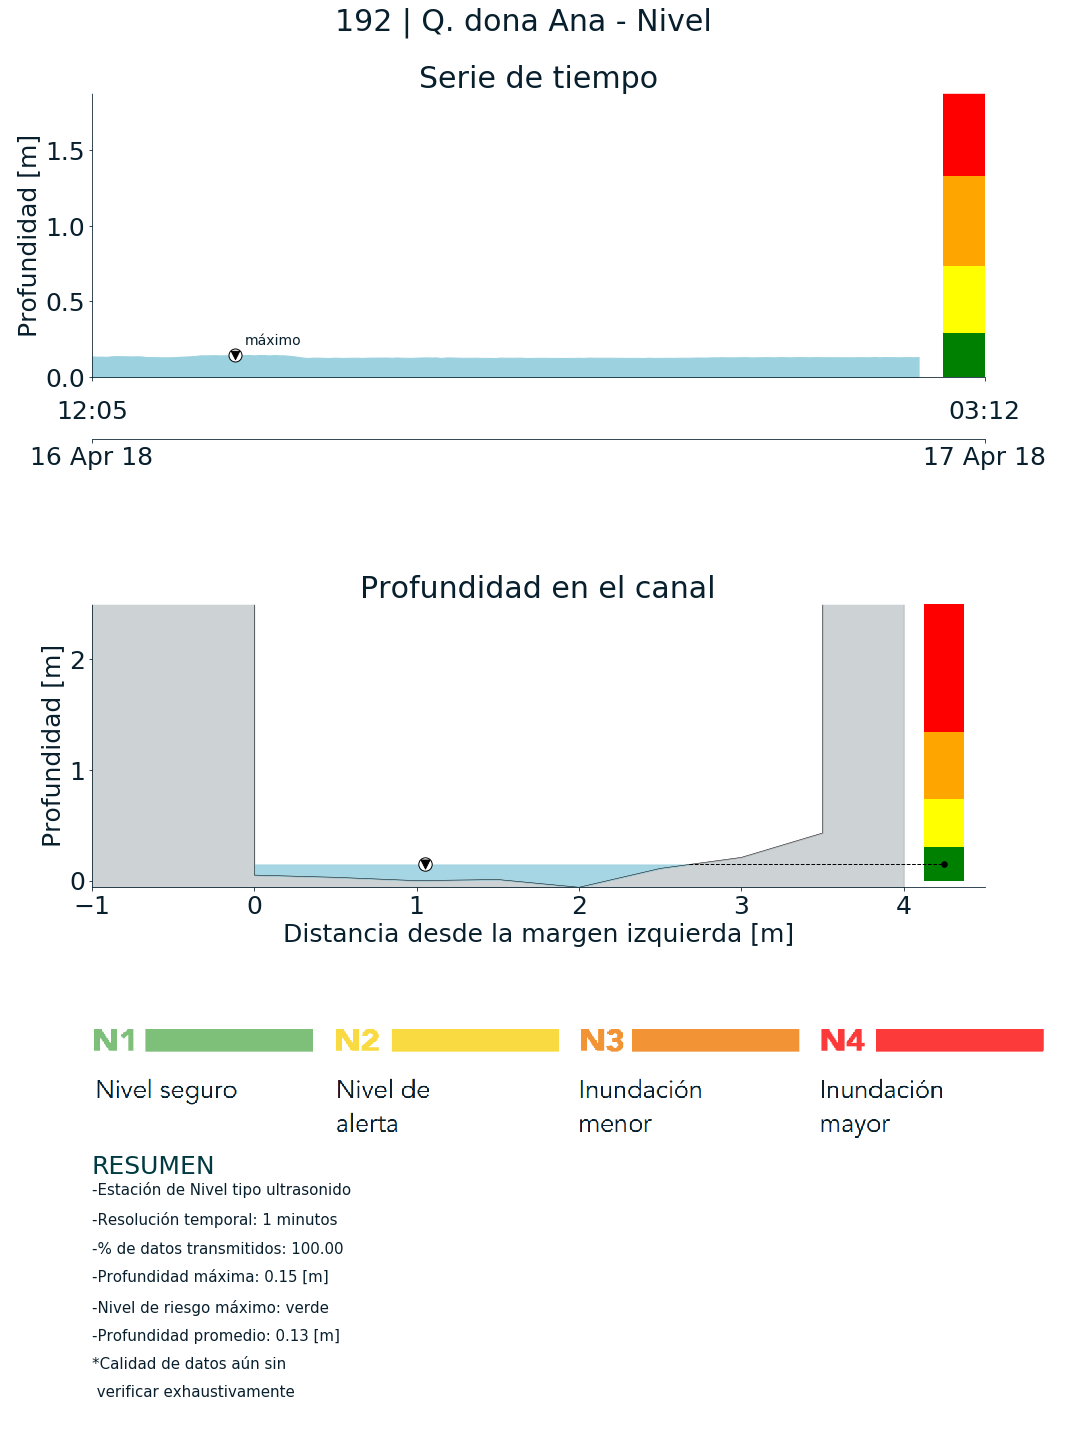

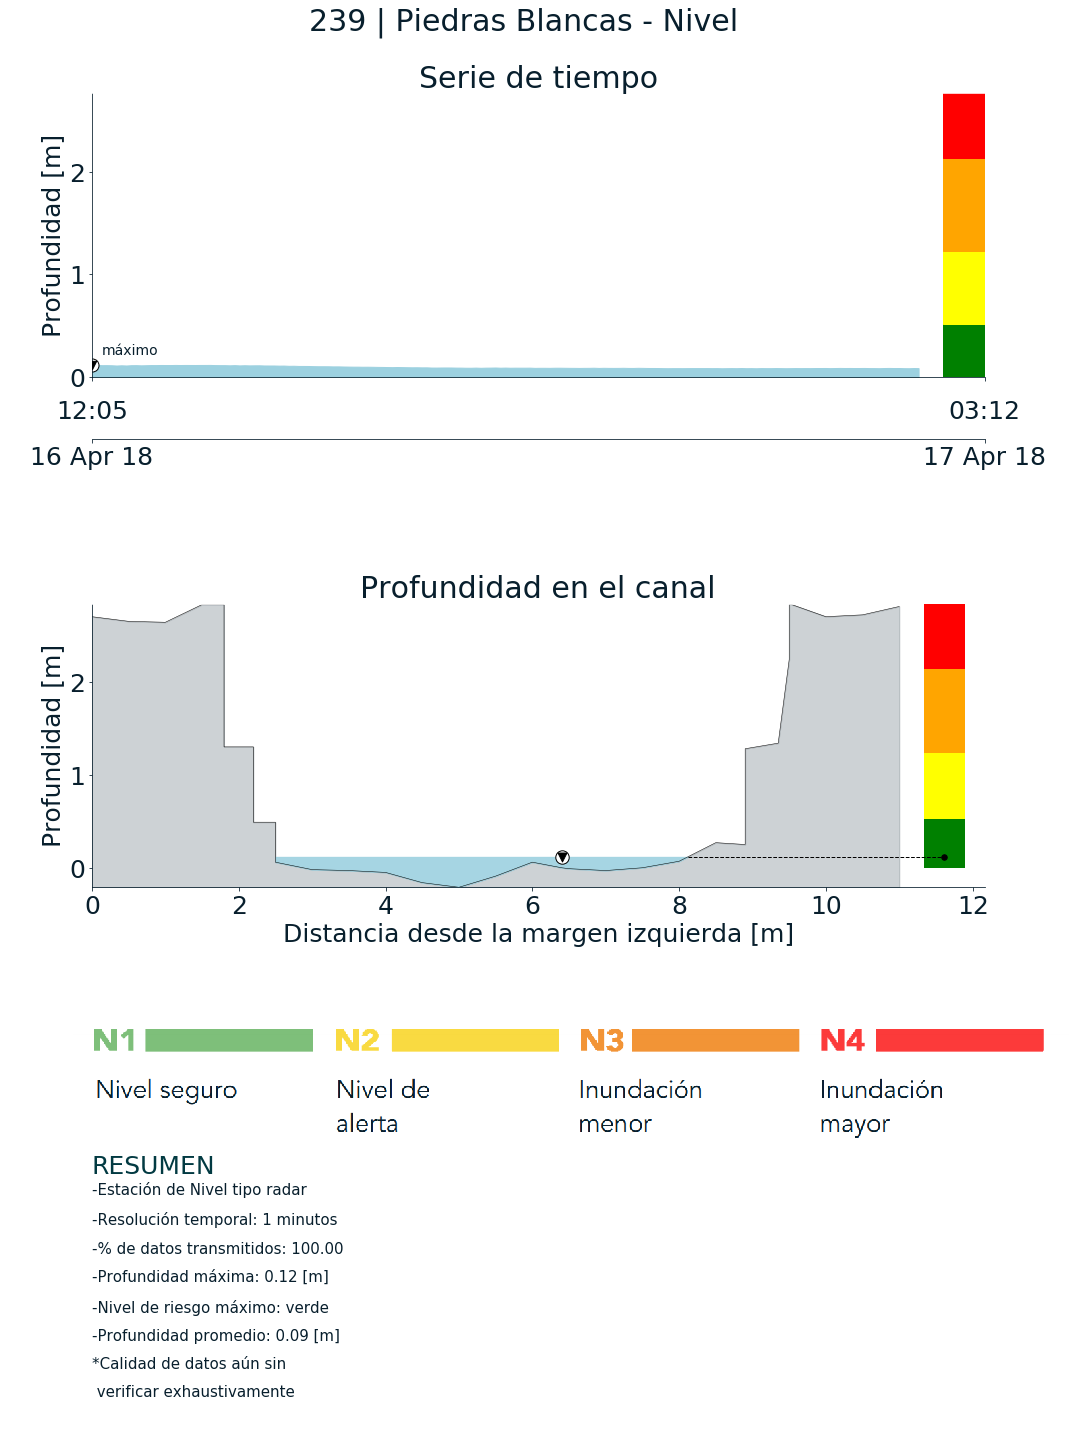

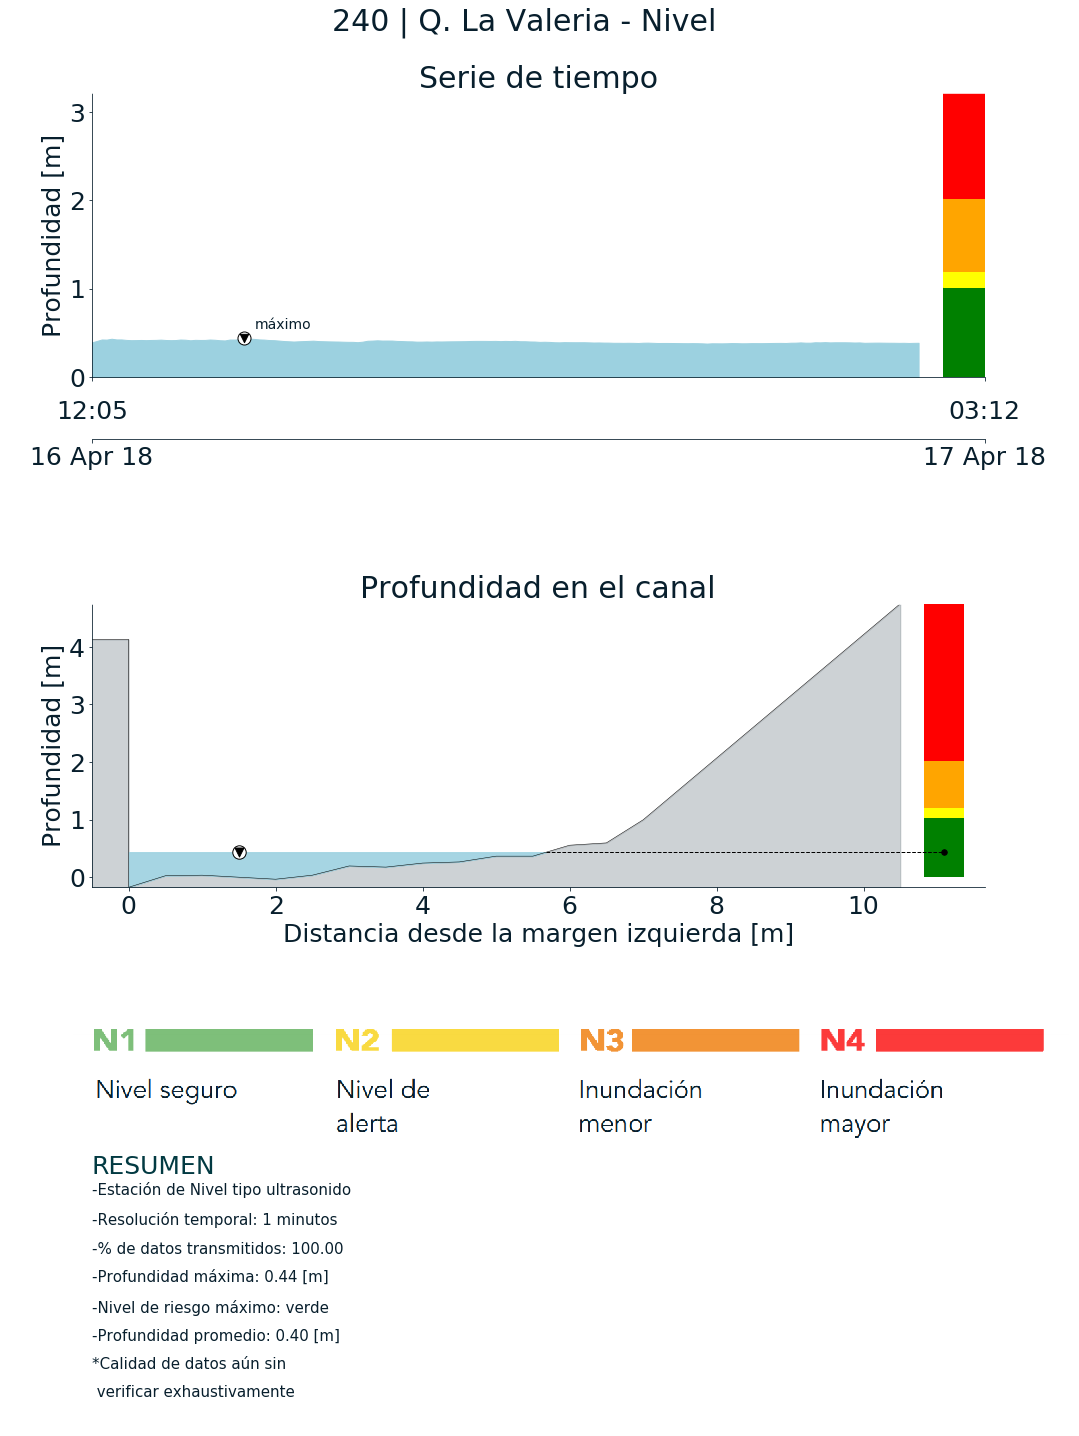

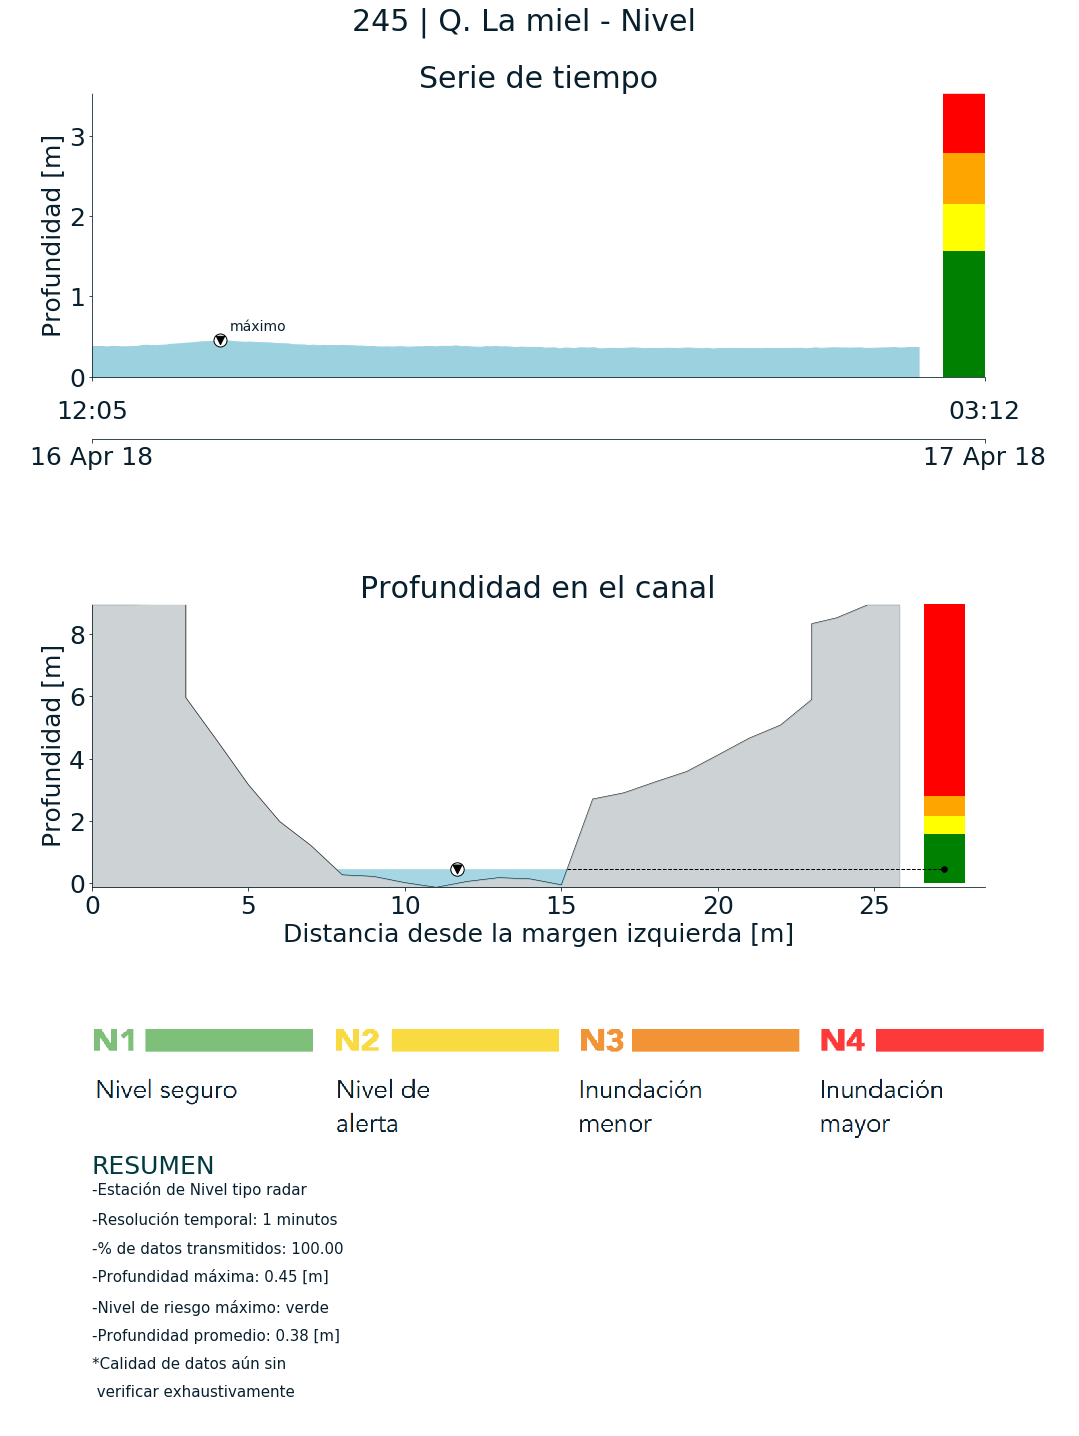

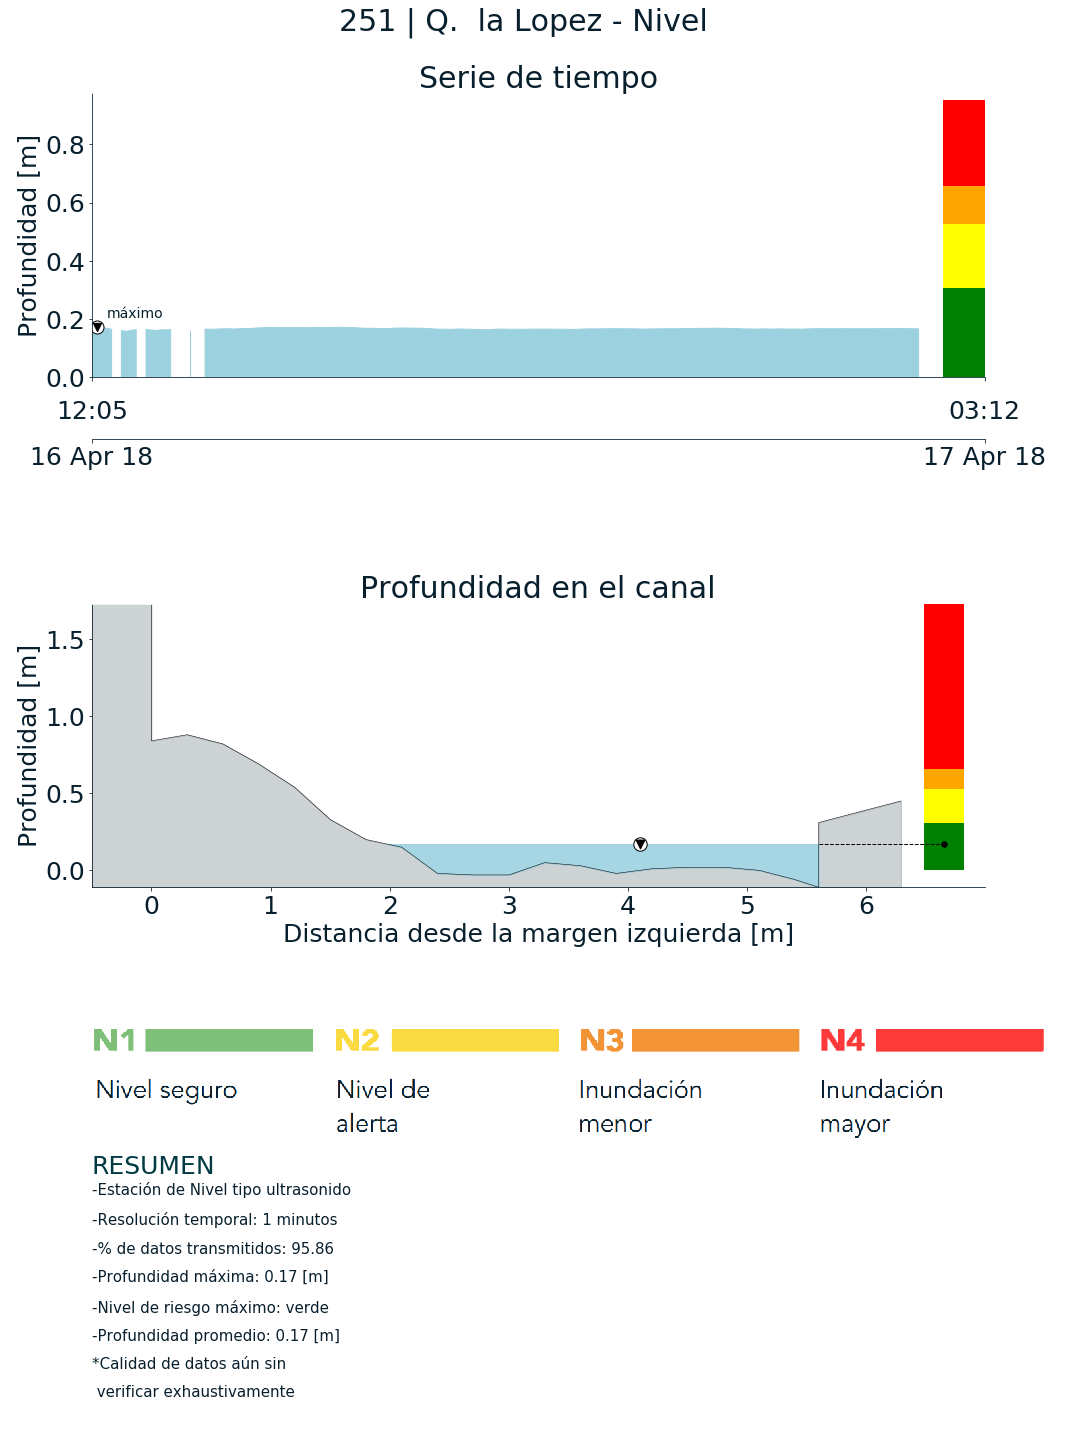

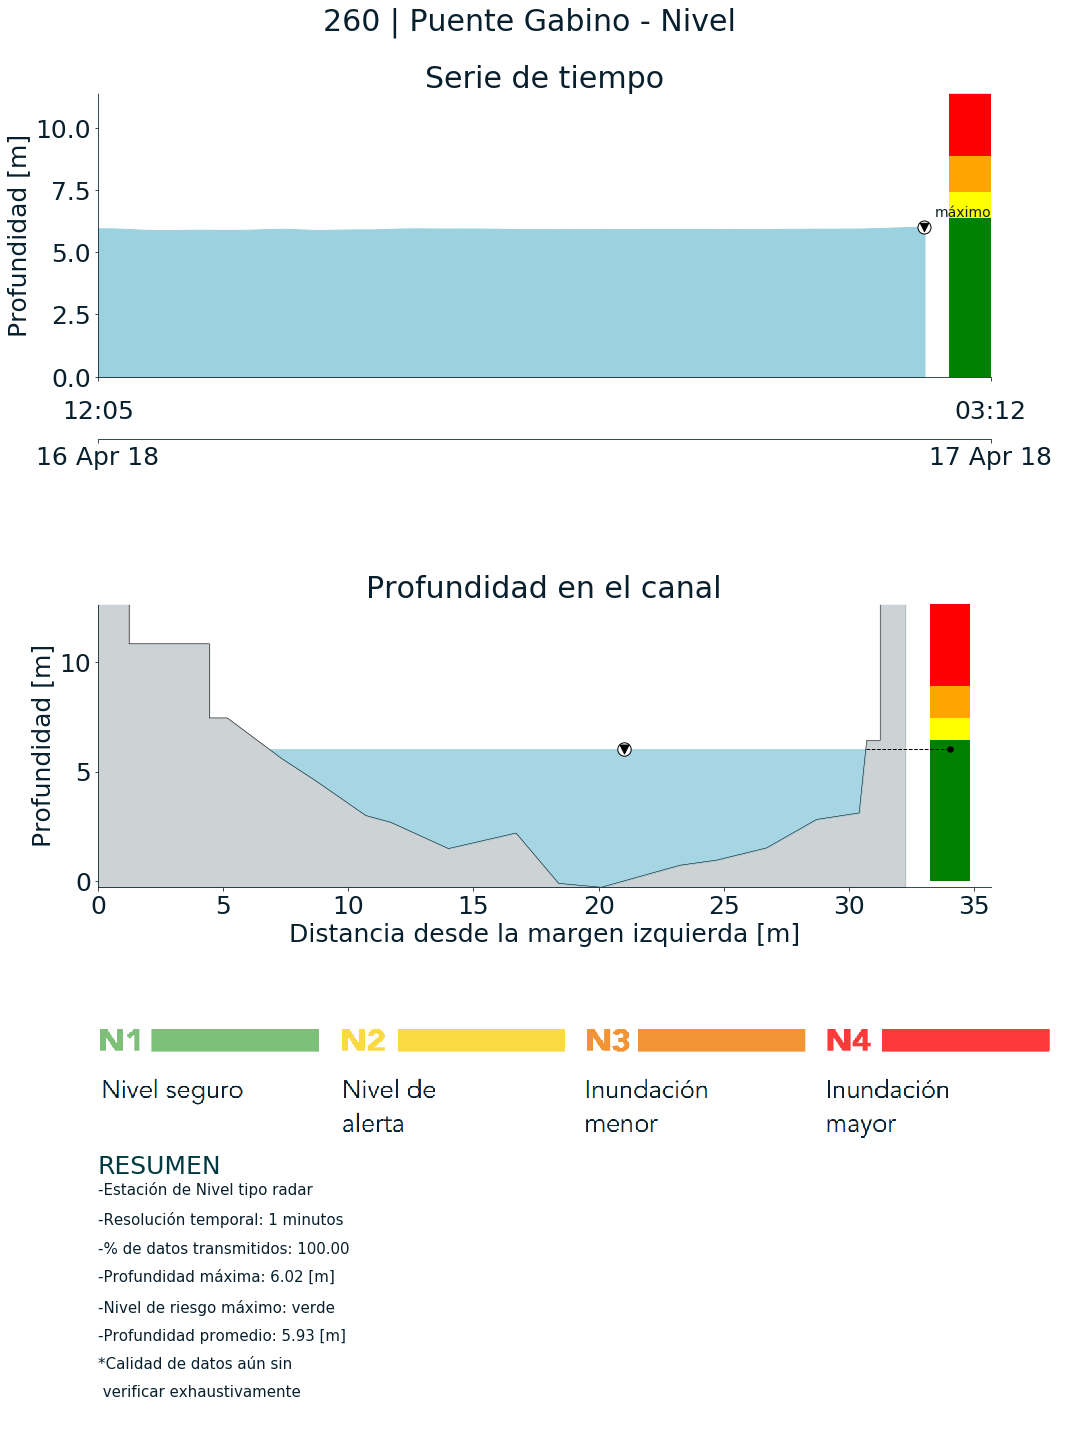

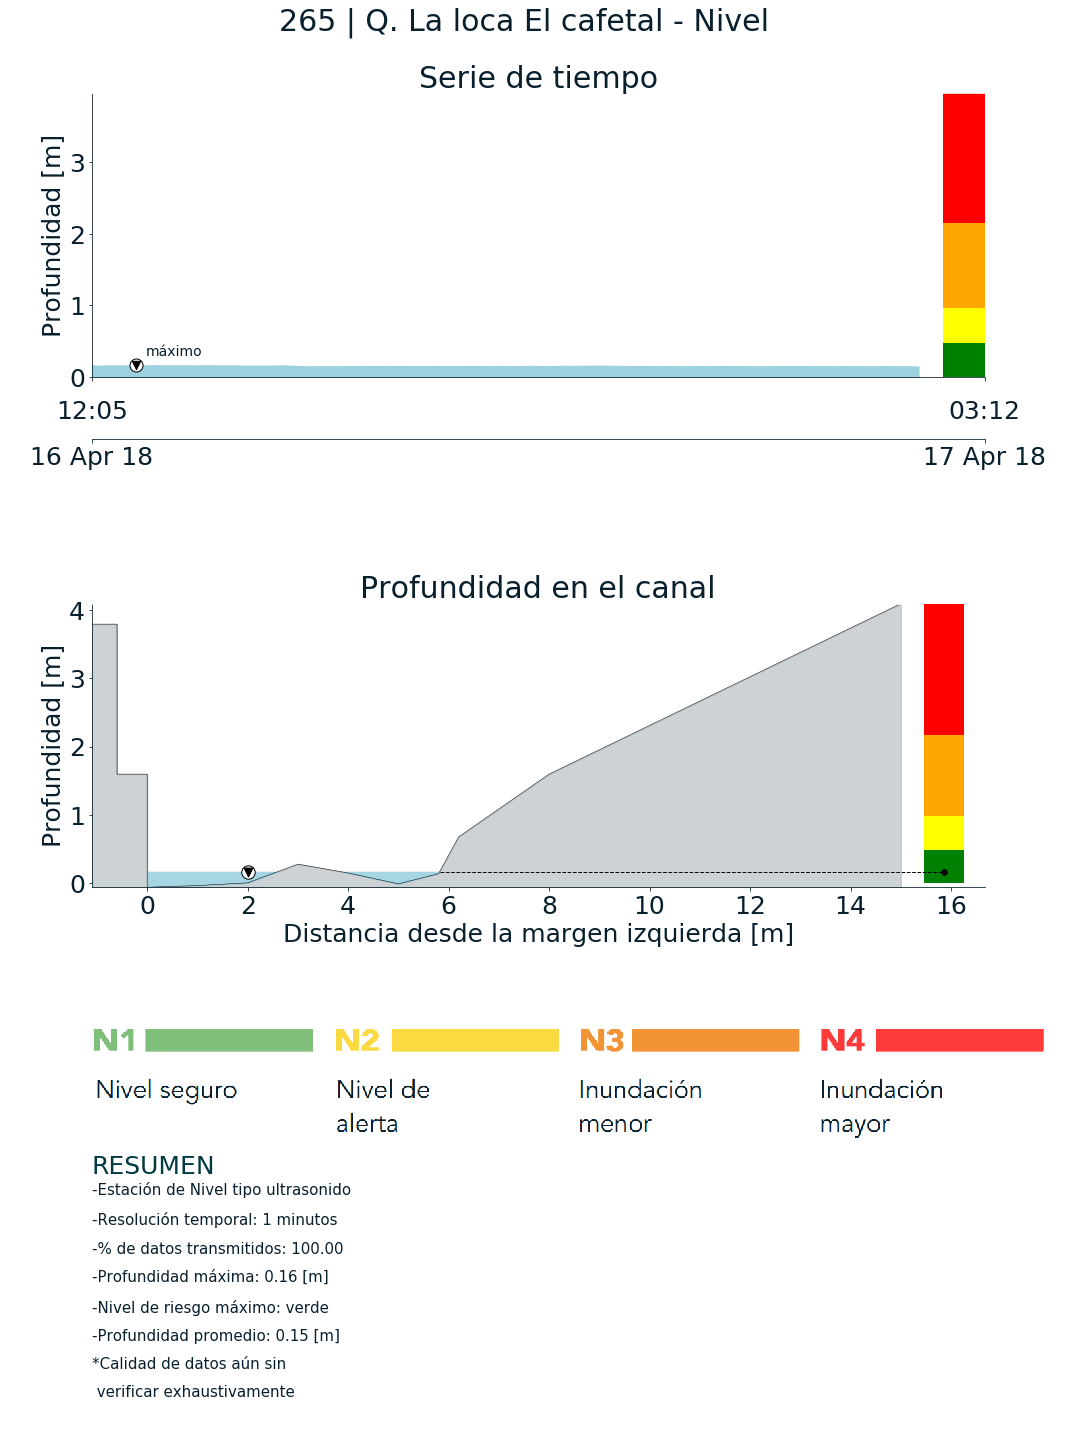

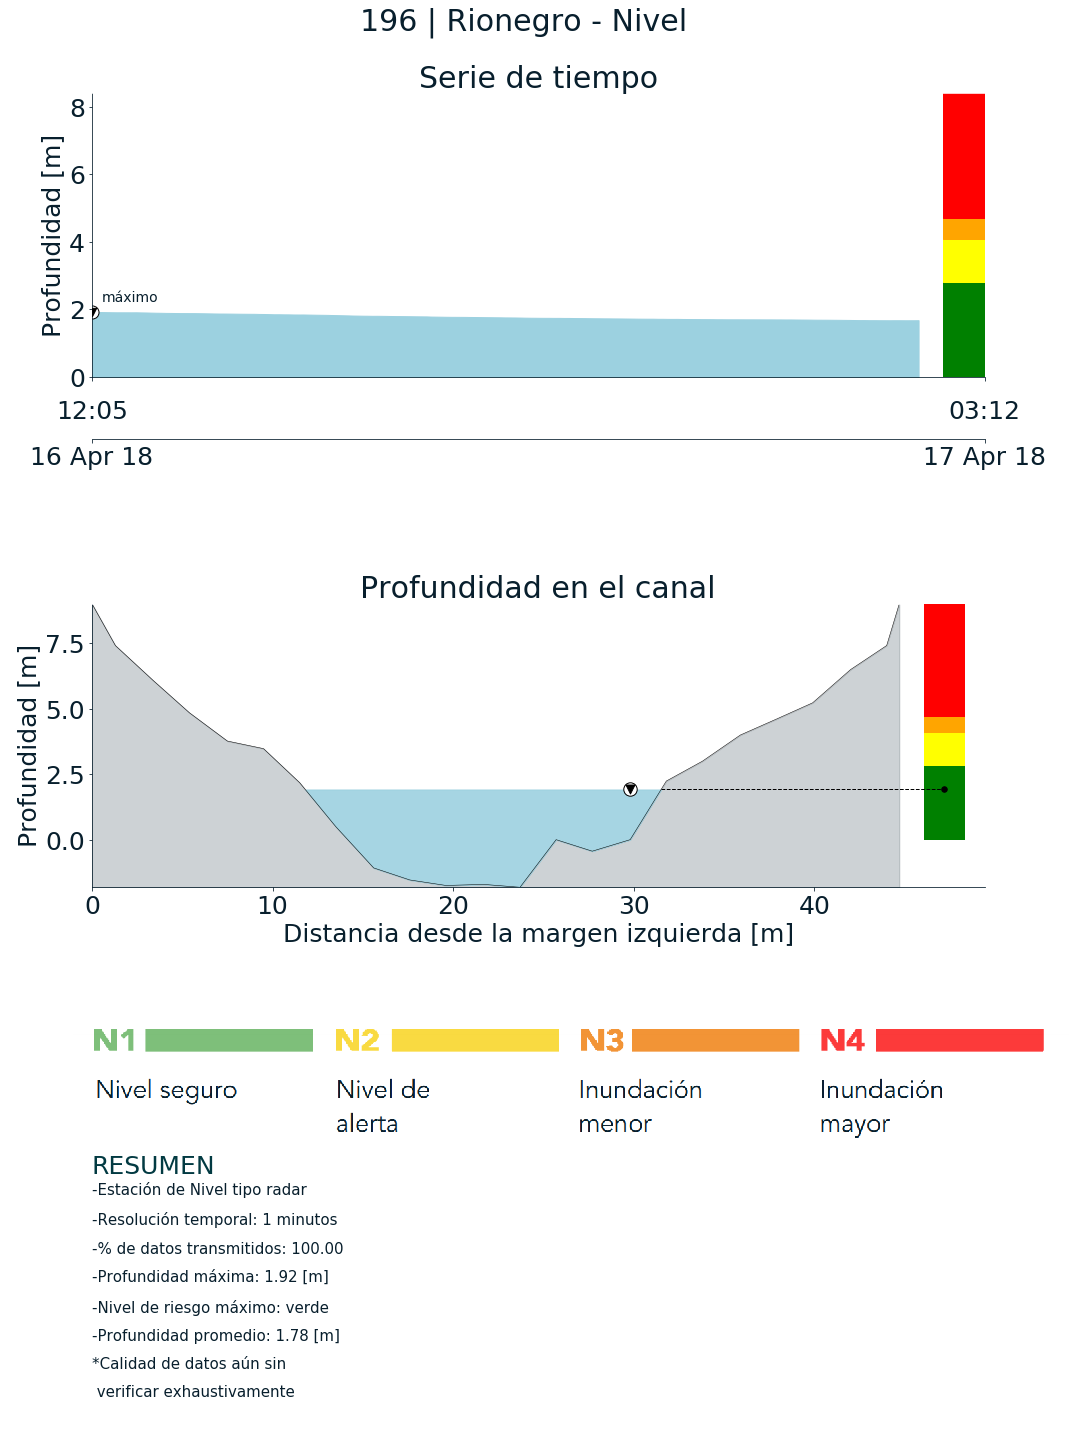

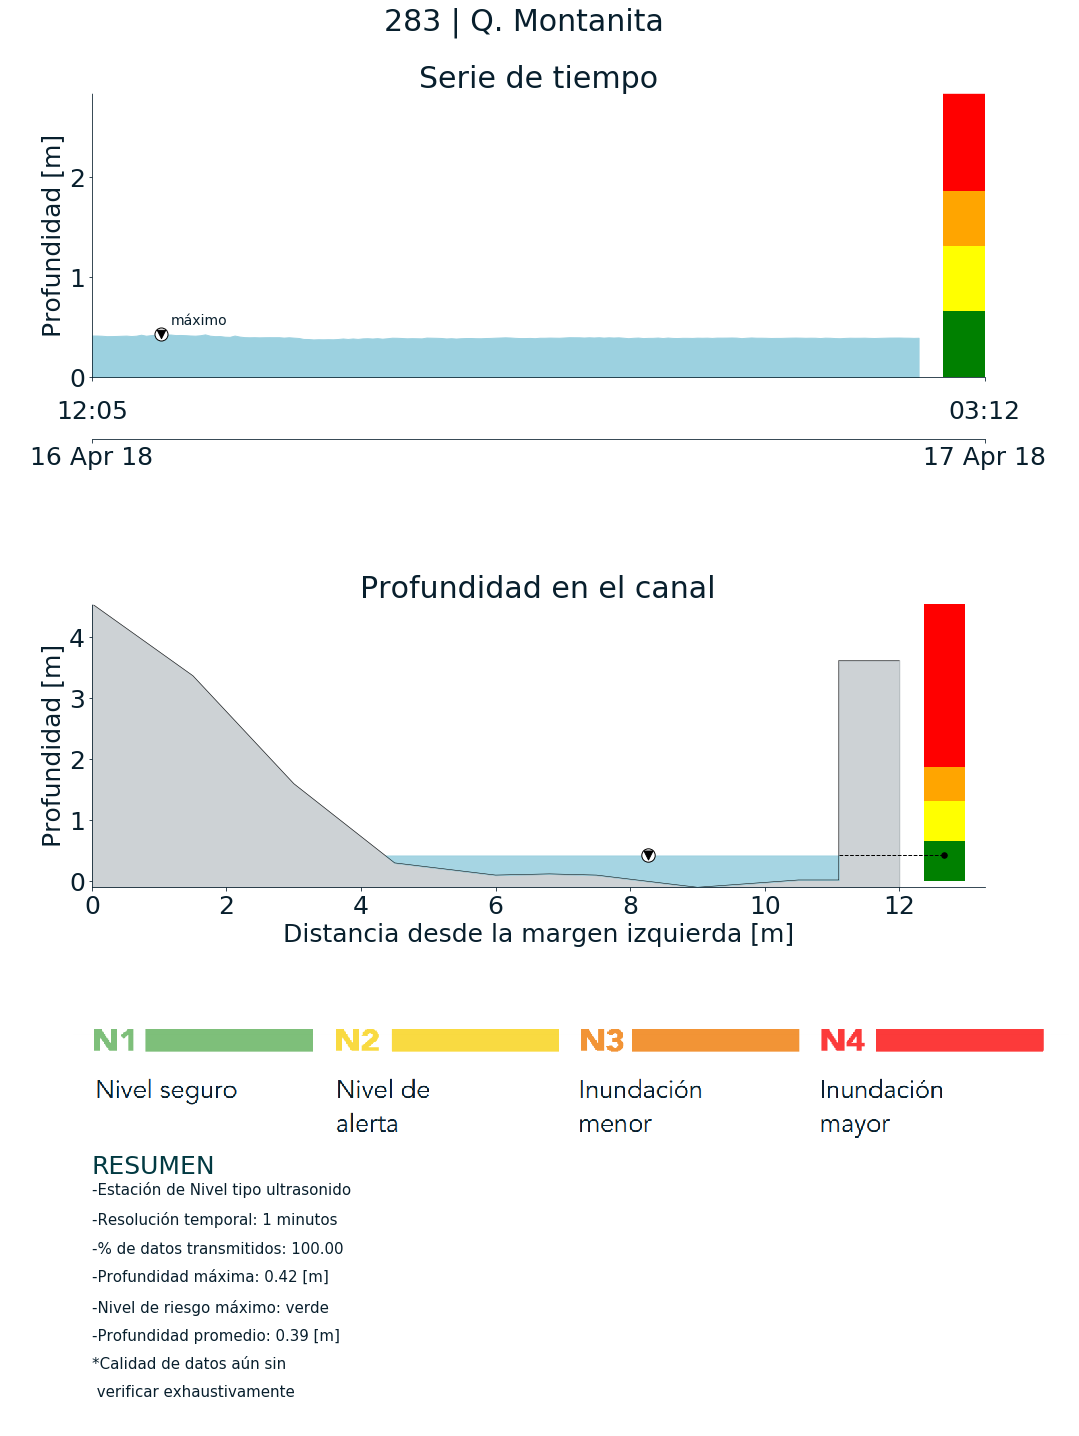

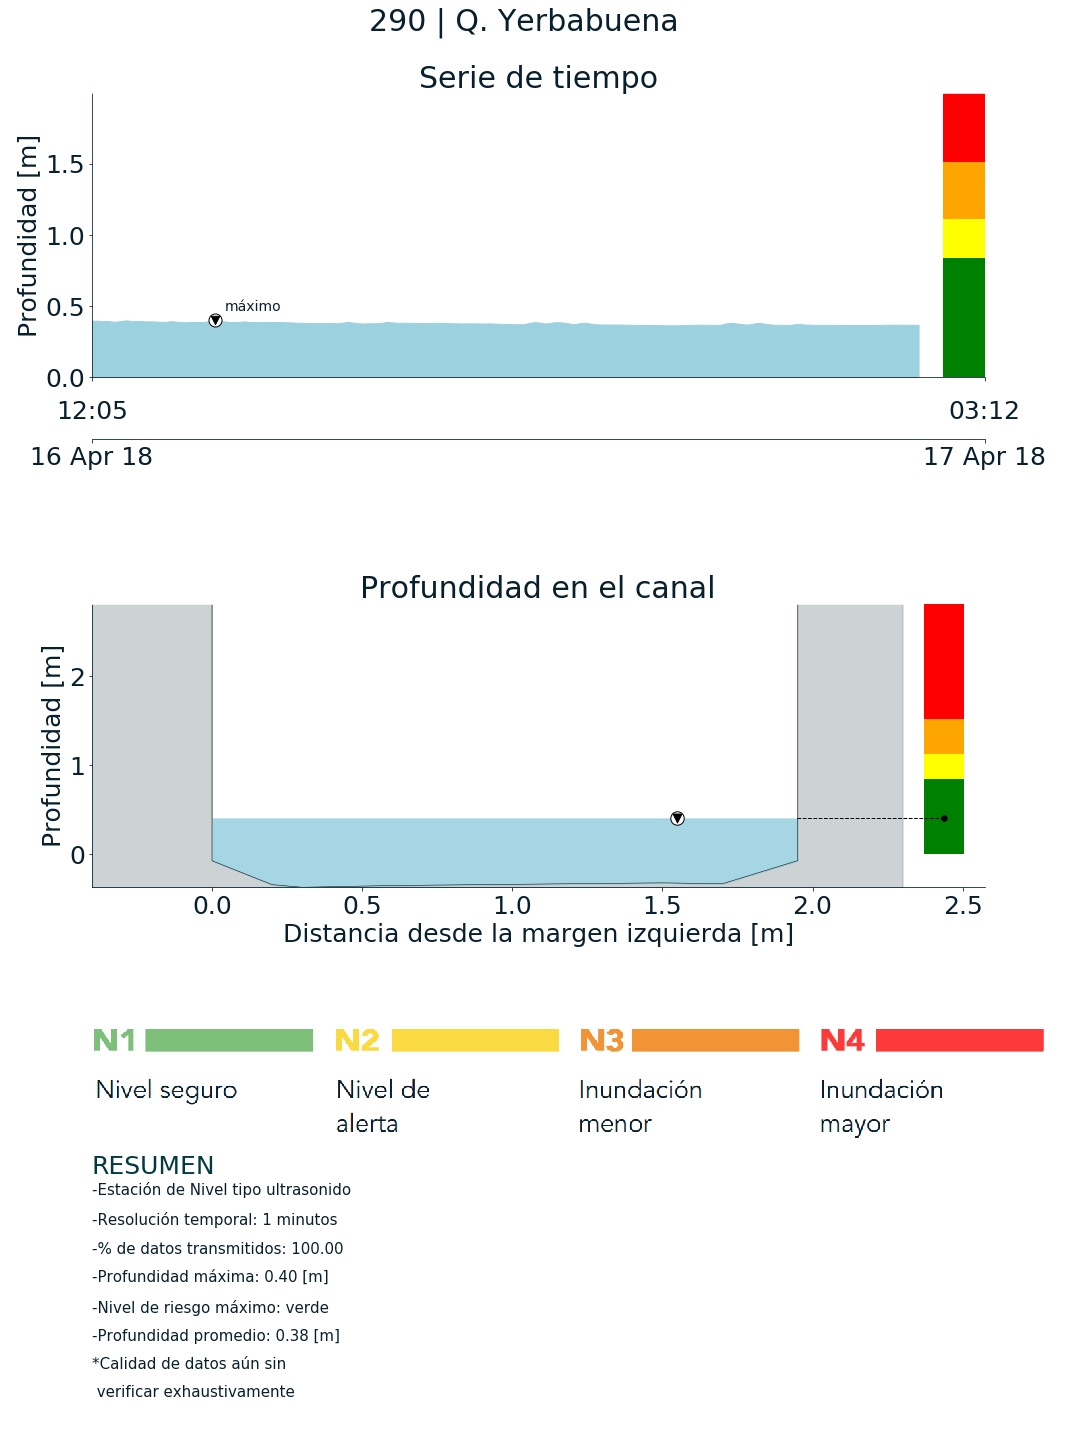

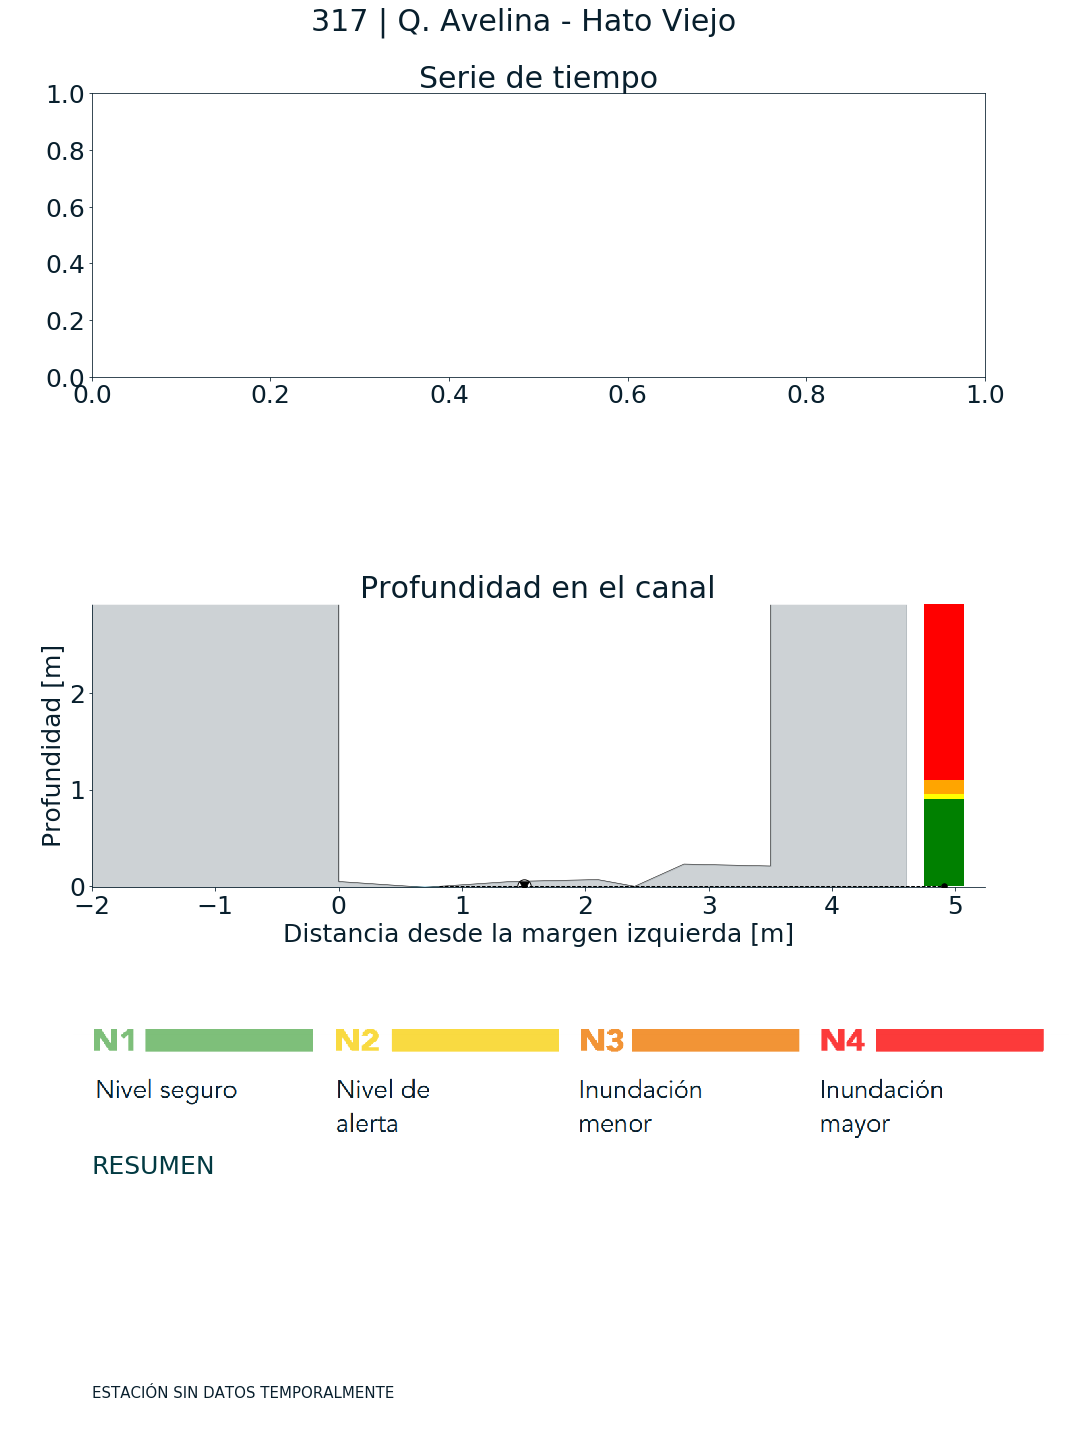

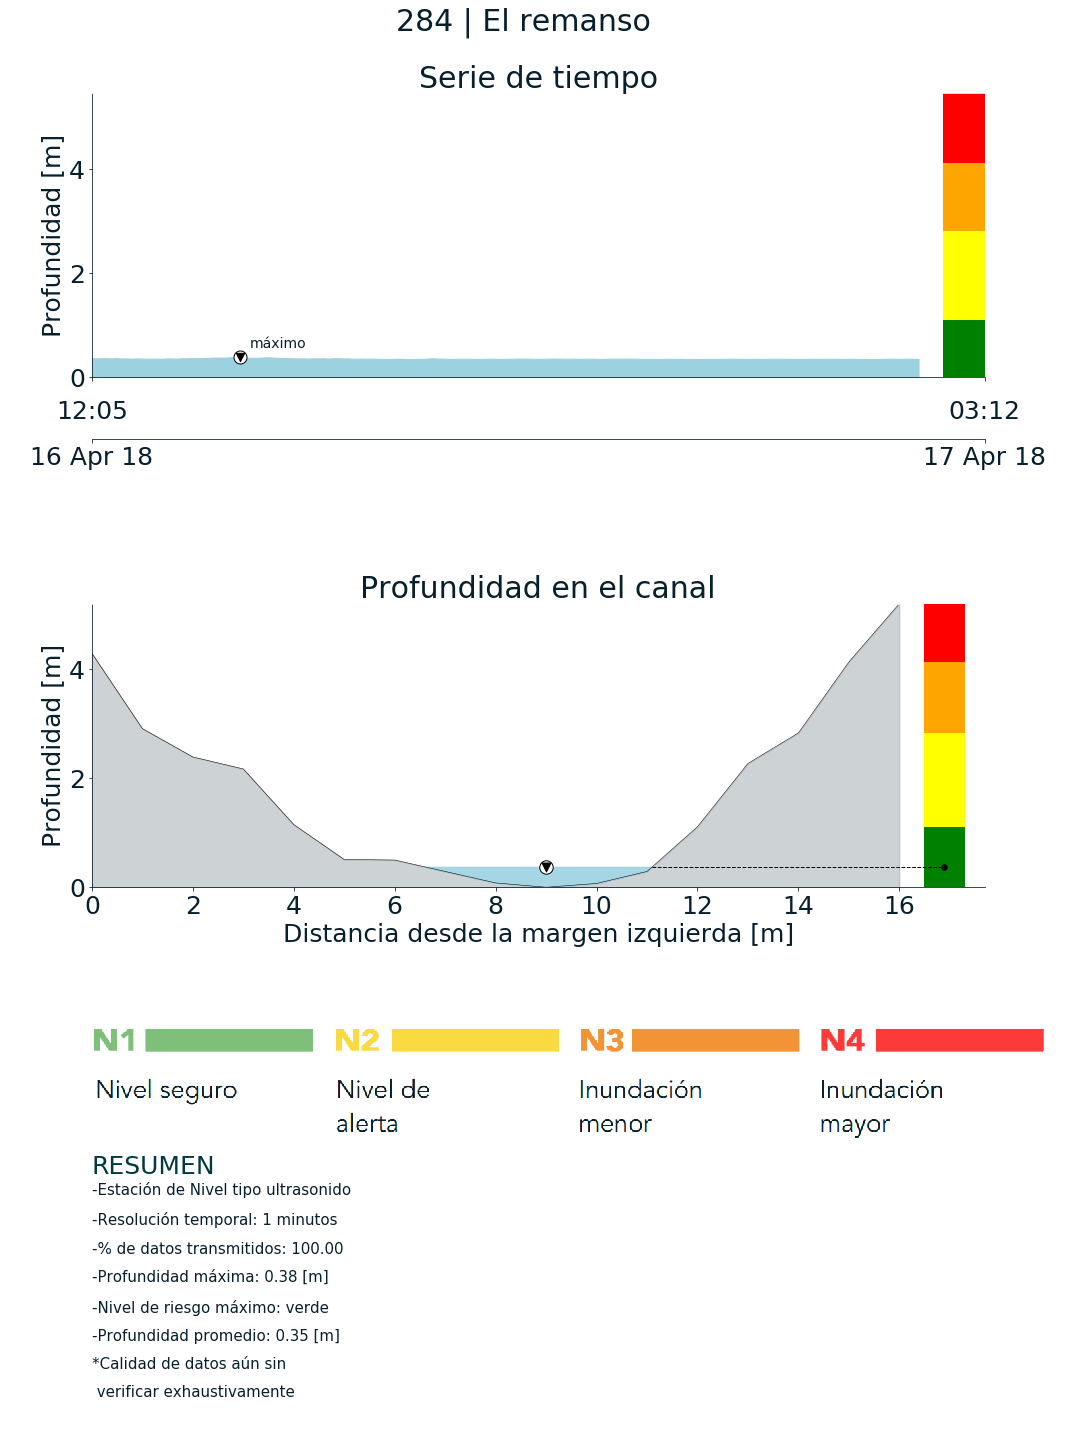

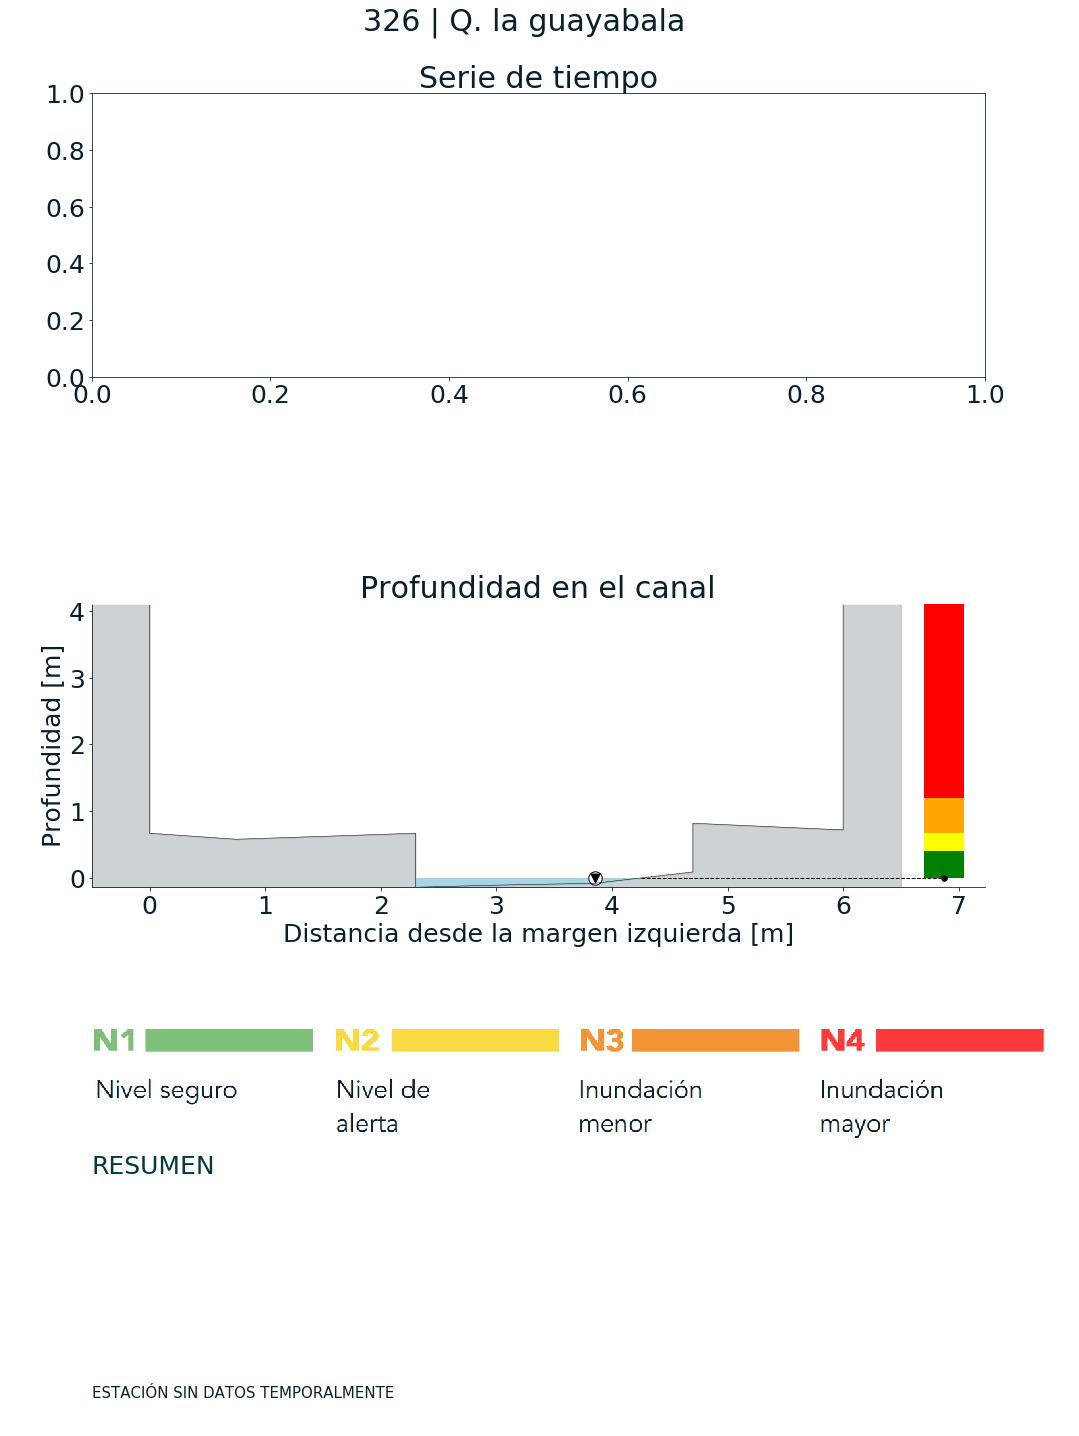

In [45]:
inicia = datetime.datetime.now()
df = self.level_all(start,end)/100.0
for codigo in df.columns:
    self = Nivel(codigo=codigo,**info.LOCAL)
    level = df[codigo]    
    fk_id = self.read_sql("SELECT id,fecha from myusers_item where item_fk_id = '%s'"%self.info.id).sort_values('fecha').loc[0,'id']
    last_bat = self.read_sql('SELECT * FROM myusers_topo where fk_id = "%s"'%fk_id)
    las_bat = last_bat.sort_values('vertical')[['vertical','x','y']]
    try:
        self.plot_operacional(level,last_bat.set_index('vertical')[['x','y']],'3d',self.data_path+'graficas_nivel/%s.png'%self.info.slug)
    except ValueError:
        print(codigo)
print (datetime.datetime.now()-inicia)

In [49]:
end = datetime.datetime.now()
start = end - datetime.timedelta(days=30)
self.user = 'root'
self.passwd = 'mcanoYw2E#'
self.execute_sql('SET GLOBAL max_allowed_packet=1073741824;')
self.insert_myusers_hydrodata(start,end)

2018-09-28 15:07:insert_myusers_hydrodata:159.2 sec


In [51]:
self.level_local_all(start,end)

DatabaseError: Execution failed on sql 'select codigo,fecha,profundidad from myusers_hydrodata where fecha between '2018-08-29 15:04' and '2018-09-28 15:04'': (1054, "Unknown column 'codigo' in 'field list'")

In [52]:
self.read_sql('describe myusers_hydrodata')

Field         Type Null  Key Default           Extra
0                id      int(11)   NO  PRI    None  auto_increment
1             fecha  datetime(6)  YES  MUL    None                
2       profundidad       double  YES         None                
3  intensidad_radar       double  YES         None                
4         timestamp  datetime(6)   NO         None                
5           updated  datetime(6)   NO         None                
6             fk_id      int(11)   NO  MUL    None                
7           user_id      int(11)   NO  MUL    None

In [56]:
def level_local_all(self,start,end):
    '''
    Gets last topo-batimetry in db
    Parameters
    ----------
    x_sensor   :   x location of sensor or point to adjust topo-batimetry
    Returns
    ----------
    last topo-batimetry in db, DataFrame
    '''
    start,end = (start.strftime('%Y-%m-%d %H:%M'),end.strftime('%Y-%m-%d %H:%M'))
    query = "select fk_id,fecha,profundidad from myusers_hydrodata where fecha between '%s' and '%s'"%(start,end)
    df = self.read_sql(query).set_index('fk_id').loc[self.infost.index].set_index('fecha',append=True)
    codigos = df.index.levels[0]
    nivel = df.reset_index('fecha').loc[codigos,'profundidad']
    df = df.reset_index('fecha')
    df = df.set_index('fecha',append=True)
    df[df<0.0] = np.NaN
    return df.unstack(0)['profundidad']

In [59]:
data = level_local_all(self,start,end)

/home/mcano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


In [66]:
self.infost.reset_index().set_index('id').loc[data.columns,'codigo'].dropna()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


fk_id
91       90.0
93      101.0
94      104.0
96      106.0
98      108.0
99      109.0
109     124.0
115     140.0
116     143.0
128     236.0
135     181.0
145    1014.0
169     240.0
179     246.0
183     251.0
186     260.0
192     273.0
Name: codigo, dtype: float64

In [68]:
trasversal 35 c - sur # 30-46 barrio uribe ángel

Int64Index([  90,   91,   92,   93,   94,   96,   98,   99,  101,  104,  106,
             108,  109,  115,  116,  124,  128,  134,  135,  140,  143,  145,
             150,  152,  155,  158,  161,  166,  169,  173,  179,  181,  182,
             183,  186,  187,  192,  195,  196,  236,  238,  239,  240,  245,
             246,  247,  251,  259,  260,  265,  268,  272,  273,  283,  284,
             290,  316,  317,  326, 1013, 1014],
           dtype='int64', name='fk_id')